In [1]:
import pandas as pd

#set seaborn color pallete
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('plasma')
pal = sns.set_palette('plasma')

# This module displays Markdown and helps with visability within Juypter Notebooks
from IPython.display import Markdown, display, HTML

# Import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import Metrics
from sklearn.metrics import (
    classification_report, confusion_matrix,
    recall_score, plot_confusion_matrix)

#Disable Warnings 
import warnings
warnings.filterwarnings('ignore')

#Import functions
import acquire as a
import prepare as p
import explore as e
import model as m 

# Acquire and Prepare

In [2]:
df, revert_key, replace_key = p.wrangle_data()
df.head()

qkey   device_type language    form              attitude  \
0  100363  Mobile phone  English  Form 1   Somewhat optimistic   
1  101224  Mobile phone  English  Form 1   Somewhat optimistic   
2  101437       Desktop  English  Form 1  Somewhat pessimistic   
3  102130  Mobile phone  English  Form 1   Somewhat optimistic   
4  103094  Mobile phone  English  Form 1   Somewhat optimistic   

            avg_family                     happen_general  \
0            Get worse  The U.S. economy will be STRONGER   
1           Get better  The U.S. economy will be STRONGER   
2            Get worse    The U.S. economy will be WEAKER   
3  Stay about the same    The U.S. economy will be WEAKER   
4  Stay about the same                            Refused   

                         happen_health                    happen_race  \
0  Health care will be MORE affordable    Race relations will IMPROVE   
1  Health care will be LESS affordable    Race relations will IMPROVE   
2  Health care will be LESS affordable  Race relations will GET WORSE   
3  Health care will be LESS affordable    Race relations will IMPROVE   
4  Health care will be LESS affordable                        Refused   

                                     happen_usa  ...  \
0  The U.S. will be MORE important in the world  ...   
1  The U.S. will be MORE important in the world  ...   
2  The U.S. will be LESS important in the world  ...   
3  The U.S. will be LESS important in the world  ...   
4  The U.S. will be LESS important in the world  ...   

  family_income_three_categories  \
0                       $75,000+   
1                    $30-$74,999   
2                       <$30,000   
3             Don't know/Refused   
4                       <$30,000   

                                  registered_to_vote political_views  \
0  You are ABSOLUTELY CERTAIN that you are regist...         Liberal   
1  You are ABSOLUTELY CERTAIN that you are regist...    Conservative   
2  You are ABSOLUTELY CERTAIN that you are regist...    Conservative   
3  You are ABSOLUTELY CERTAIN that you are regist...        Moderate   
4  You are NOT registered to vote at your current...         Liberal   

     internet_access volunteer    weight is_pes pes_val is_very_pes  \
0      Internet User        No  0.599006      0       1           0   
1      Internet User       Yes  0.292981      0       1           0   
2      Internet User        No  0.418871      1       2           0   
3  Non Internet User       Yes  0.342058      0       1           0   
4      Internet User       Yes  0.329465      0       1           0   

  is_very_opt  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 128 columns]

# Split Male/Female

In [3]:
males_df = df[df.sex == "Male"]
females_df = df[df.sex == "Female"]

In [4]:
#Make Dummies 
males_dummies = pd.get_dummies(males_df, drop_first = True)
females_dummies = pd.get_dummies(females_df, drop_first = True)

# Train, Validate, and Test Split

In [45]:
train_m, validate_m, test_m = p.train_validate_test_split(males_df, 'is_pes')

In [46]:
train_f, validate_f, test_f = p.train_validate_test_split(females_df, 'is_pes')

In [47]:
train_dummies_m, validate_dummies_m, test_dummies_m = p.train_validate_test_split(males_dummies, 'is_pes')

In [48]:
train_dummies_f, validate_dummies_f, test_dummies_f = p.train_validate_test_split(females_dummies, 'is_pes')

# Explore by Question 

## Most Important Issues Females by Question

In [49]:
# Generate object
obj_f = e.generate_and_return_obj(train_f)
# Examine the chi2 results and return the most signficant values from them
issues_female = obj_f.chi2_df.sort_values(by='p_val')
issues_female.head(10)

chi2         p_val deg_free  \
happen_general    84.582240  4.297342e-19        2   
happen_child_f2   60.152566  8.670341e-14        2   
happen_race       58.865096  1.650467e-13        2   
happen_pub_ed     53.248030  2.737394e-12        2   
job_benefits      55.415261  5.599109e-12        3   
job_security      55.028598  6.770388e-12        3   
elder_care        42.063426  7.345869e-10        2   
happen_health     40.303906  1.770590e-09        2   
envir_50yrs       43.518288  1.910100e-09        3   
worry_government  45.153076  3.694997e-09        4   

                                                      expected_freq  
happen_general    [[20.48847926267281, 15.511520737327189], [91....  
happen_child_f2   [[46.2962962962963, 33.7037037037037], [67.708...  
happen_race       [[104.71889400921658, 79.28110599078342], [116...  
happen_pub_ed     [[23.903225806451612, 18.096774193548388], [13...  
job_benefits      [[96.18202764976958, 72.81797235023042], [56.3...  
job_security      [[90.49078341013825, 68.50921658986175], [114....  
elder_care        [[59.1889400921659, 44.8110599078341], [186.67...  
happen_health     [[149.110599078341, 112.88940092165899], [77.4...  
envir_50yrs       [[64.3110599078341, 48.6889400921659], [33.009...  
worry_government  [[99.59677419354838, 75.40322580645162], [4.55...

<AxesSubplot:xlabel='p_val'>

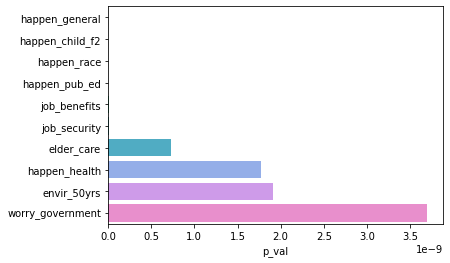

In [51]:
sns.barplot(y = issues_female[0:10].index, x = issues_female[0:10].p_val)

<AxesSubplot:xlabel='chi2'>

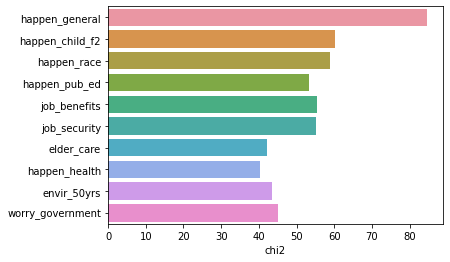

In [53]:
sns.barplot(y = issues_female[0:10].index, x = issues_female[0:10].chi2)

## Most Important Issues Males by Question

In [54]:
# Generate object
obj_m = e.generate_and_return_obj(train_m)
# Examine the chi2 results and return the most signficant values from them
issues_male = obj_m.chi2_df.sort_values(by='p_val').head(10)
issues_male.head(10)

chi2         p_val deg_free  \
happen_general                   97.069095  8.350527e-22        2   
happen_pub_ed                    53.154387  2.868611e-12        2   
happen_politics                  49.322163  1.949074e-11        2   
happen_race                      47.459004  4.947755e-11        2   
job_security                     38.558751  4.237148e-09        2   
debt_30yrs                       39.489327  1.367064e-08        3   
happen_wealthgap                 34.767853  2.820049e-08        2   
happen_65up_f1                   34.590975  3.080812e-08        2   
happen_usa                       33.783649  4.612897e-08        2   
share_americans_in_middle_class  36.873429  4.894022e-08        3   

                                                                     expected_freq  
happen_general                   [[10.852272727272727, 9.147727272727273], [75....  
happen_pub_ed                    [[12.480113636363637, 10.519886363636363], [10...  
happen_politics                  [[10.852272727272727, 9.147727272727273], [59....  
happen_race                      [[75.42329545454545, 63.57670454545455], [101....  
job_security                     [[66.19886363636364, 55.80113636363637], [104....  
debt_30yrs                       [[4.340909090909091, 3.659090909090909], [20.6...  
happen_wealthgap                 [[10.309659090909092, 8.690340909090908], [33....  
happen_65up_f1                   [[40.02040816326531, 33.97959183673469], [61.1...  
happen_usa                       [[12.480113636363637, 10.519886363636363], [11...  
share_americans_in_middle_class  [[100.38352272727273, 84.61647727272727], [50....

<AxesSubplot:xlabel='p_val'>

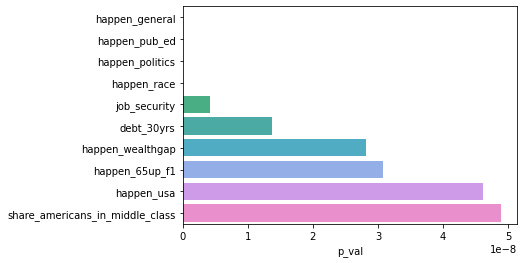

In [55]:
sns.barplot(y = issues_male[0:10].index, x = issues_male[0:10].p_val)

<AxesSubplot:xlabel='chi2'>

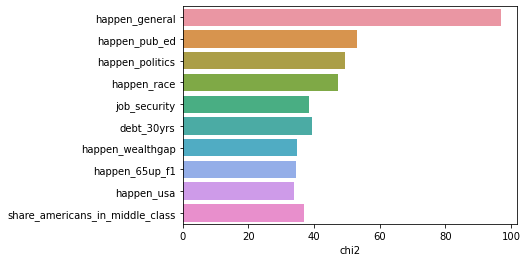

In [57]:
sns.barplot(y = issues_male[0:10].index, x = issues_male[0:10].chi2)

### Key Takeaways

The issues that were most critical for women (based on the chi-squared test) are: 
   - the general future of the United States, 
   - the future of children, 
   - the future of racial relations, 
   - the future of public education. 
   - job benefits, and 
   - job security. 

The issues most correlated with pessimism for men are:
 - What will happen generally to the future of the country. 
 - What will happend to the public education system. 
 - The future of politics. 
 - The future of race relations. 
 
There were more issues were more strongly correlated with pessismism for women than for men. In general, it appears that women and men are concerned with the same topics, but women just care about a wider range of topics. 

## Gender Differences by Question

In [68]:
important_for_females = issues_female[issues_female.p_val < 0.05]
important_for_males = issues_male[issues_male.p_val < 0.05]

In [69]:
important_for_females_list = important_for_females.index.to_list()
important_for_females_list

['happen_general',
 'happen_child_f2',
 'happen_race',
 'happen_pub_ed',
 'job_benefits',
 'job_security',
 'elder_care',
 'happen_health',
 'envir_50yrs',
 'worry_government',
 'worry_leaders',
 'happen_politics',
 'happen_usa',
 'happen_terroist',
 'share_americans_in_middle_class',
 'worry_public_schools',
 'happen_wealthgap',
 'happen_65up_f1',
 'worry_economy',
 'worry_morals',
 'fut_marriage',
 'ethnic_conflict',
 'happen_rel',
 'share_americans_in_lower_class',
 'happen_china',
 'happen_energy',
 'robot_replacement_increase_inequality',
 'debt_30yrs',
 'gov_in_wash',
 'major_corps',
 'happen_alzheimers',
 'automation_good_or_bad',
 'rel_groups',
 'happen_anti_semitism',
 'robot_replacement_means_better_jobs_for_humans',
 'pop_growth',
 'legal_immigration_levels',
 'priority_avoid_tax_increase',
 'military',
 'race_and_ethnicity',
 'evangelical_christian',
 'schools',
 'fut_abortion',
 'harass_personal_exp',
 'ethnic_customs',
 'fut_kids',
 'family_income_three_categories',
 'his

In [70]:
important_for_males_list = important_for_males.index.to_list()
important_for_males_list

['happen_general',
 'happen_pub_ed',
 'happen_politics',
 'happen_race',
 'job_security',
 'debt_30yrs',
 'happen_wealthgap',
 'happen_65up_f1',
 'happen_usa',
 'share_americans_in_middle_class']

In [71]:
len(important_for_females), len(important_for_males)

(48, 10)

In [72]:
important_for_females_but_not_males = set(important_for_females_list).difference(set(important_for_males_list))
important_for_females_but_not_males

{'automation_good_or_bad',
 'elder_care',
 'envir_50yrs',
 'ethnic_conflict',
 'ethnic_customs',
 'evangelical_christian',
 'family_income_three_categories',
 'fut_abortion',
 'fut_kids',
 'fut_marriage',
 'gov_in_wash',
 'happen_alzheimers',
 'happen_anti_semitism',
 'happen_child_f2',
 'happen_china',
 'happen_energy',
 'happen_health',
 'happen_rel',
 'happen_terroist',
 'harass_personal_exp',
 'hispanic_or_latino',
 'job_benefits',
 'legal_immigration_levels',
 'major_corps',
 'military',
 'pop_growth',
 'priority_avoid_tax_increase',
 'race_and_ethnicity',
 'rel_groups',
 'robot_replacement_increase_inequality',
 'robot_replacement_means_better_jobs_for_humans',
 'schools',
 'share_americans_in_lower_class',
 'worry_economy',
 'worry_government',
 'worry_leaders',
 'worry_morals',
 'worry_public_schools'}

In [63]:
important_for_males_but_not_females = set(important_for_males_list).difference(set(important_for_females_list))
important_for_males_but_not_females

set()

### Key Takeaways

There are 48 statistically significant topics for women, but only 10 for men. Women care about all the topics men care about, they just care about a wider range of topics. 

# Explore by Response

## Most Import Issues for Females by Reponse

In [79]:
# Generate object
obj_f = e.generate_and_return_obj(train_dummies_f)
# Examine the chi2 results and return the most signficant values from them
issues_female_responses = obj_f.chi2_df.sort_values(by='p_val')
issues_female_responses.head(10)

chi2         p_val  \
attitude_Somewhat pessimistic                       263.867025  2.463885e-59   
avg_family_Get worse                                103.524515  2.571920e-24   
happen_general_The U.S. economy will be WEAKER       78.071526  9.937617e-19   
happen_general_The U.S. economy will be STRONGER     74.006298  7.786820e-18   
attitude_Very pessimistic                            70.366478  4.924975e-17   
happen_pub_ed_The public education system will ...   48.397465  3.480178e-12   
job_security_Less job security                       46.012983  1.174719e-11   
happen_pub_ed_The public education system will ...   45.590718  1.457306e-11   
happen_race_Race relations will IMPROVE              44.632848  2.376705e-11   
attitude_Very optimistic                             42.753478  6.209139e-11   

                                                   deg_free  \
attitude_Somewhat pessimistic                             1   
avg_family_Get worse                                      1   
happen_general_The U.S. economy will be WEAKER            1   
happen_general_The U.S. economy will be STRONGER          1   
attitude_Very pessimistic                                 1   
happen_pub_ed_The public education system will ...        1   
job_security_Less job security                            1   
happen_pub_ed_The public education system will ...        1   
happen_race_Race relations will IMPROVE                   1   
attitude_Very optimistic                                  1   

                                                                                        expected_freq  
attitude_Somewhat pessimistic                       [[168.46082949308754, 127.53917050691244], [78...  
avg_family_Get worse                                [[128.05299539170508, 96.94700460829493], [118...  
happen_general_The U.S. economy will be WEAKER      [[112.11751152073732, 84.88248847926268], [134...  
happen_general_The U.S. economy will be STRONGER    [[155.3709677419355, 117.62903225806451], [91....  
attitude_Very pessimistic                           [[219.11290322580646, 165.88709677419354], [27...  
happen_pub_ed_The public education system will ...  [[116.67050691244239, 88.32949308755761], [130...  
job_security_Less job security                      [[132.60599078341014, 100.39400921658986], [11...  
happen_pub_ed_The public education system will ...  [[154.23271889400922, 116.76728110599079], [92...  
happen_race_Race relations will IMPROVE             [[130.89861751152074, 99.10138248847926], [116...  
attitude_Very optimistic                            [[217.40552995391704, 164.59447004608296], [29...

<AxesSubplot:xlabel='p_val'>

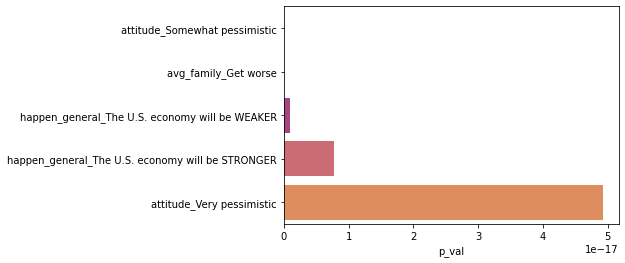

In [80]:
sns.barplot(y = issues_female_responses[0:5].index, x = issues_female_responses[0:5].p_val)

## Most Important Issues Males by Reponse

In [81]:
# Generate object
obj_m = e.generate_and_return_obj(train_dummies_m)
# Examine the chi2 results and return the most signficant values from them
issues_male_responses = obj_m.chi2_df.sort_values(by='p_val')
issues_male_responses.head(10)

chi2         p_val  \
attitude_Somewhat pessimistic                       204.644586  2.024584e-46   
avg_family_Get worse                                116.665604  3.397884e-27   
happen_general_The U.S. economy will be WEAKER       92.174165  7.937426e-22   
happen_general_The U.S. economy will be STRONGER     86.452819  1.431111e-20   
attitude_Very pessimistic                            57.183218  3.970447e-14   
happen_pub_ed_The public education system will ...   51.323950  7.831433e-13   
happen_politics_The country will be MORE politi...   47.106485  6.723286e-12   
happen_pub_ed_The public education system will ...   42.443417  7.275688e-11   
happen_politics_The country will be LESS politi...   41.213619  1.364684e-10   
debt_30yrs_Grow larger                               36.940729  1.217753e-09   

                                                   deg_free  \
attitude_Somewhat pessimistic                             1   
avg_family_Get worse                                      1   
happen_general_The U.S. economy will be WEAKER            1   
happen_general_The U.S. economy will be STRONGER          1   
attitude_Very pessimistic                                 1   
happen_pub_ed_The public education system will ...        1   
happen_politics_The country will be MORE politi...        1   
happen_pub_ed_The public education system will ...        1   
happen_politics_The country will be LESS politi...        1   
debt_30yrs_Grow larger                                    1   

                                                                                        expected_freq  
attitude_Somewhat pessimistic                       [[127.51420454545455, 107.48579545454545], [63...  
avg_family_Get worse                                [[112.86363636363636, 95.13636363636364], [78....  
happen_general_The U.S. economy will be WEAKER      [[86.81818181818181, 73.18181818181819], [104....  
happen_general_The U.S. economy will be STRONGER    [[115.0340909090909, 96.9659090909091], [75.96...  
attitude_Very pessimistic                                      [[167.125, 140.875], [23.875, 20.125]]  
happen_pub_ed_The public education system will ...  [[90.07386363636364, 75.92613636363636], [100....  
happen_politics_The country will be MORE politi...  [[70.53977272727273, 59.46022727272727], [120....  
happen_pub_ed_The public education system will ...      [[113.40625, 95.59375], [77.59375, 65.40625]]  
happen_politics_The country will be LESS politi...         [[131.3125, 110.6875], [59.6875, 50.3125]]  
debt_30yrs_Grow larger                              [[54.80397727272727, 46.19602272727273], [136....

<AxesSubplot:xlabel='p_val'>

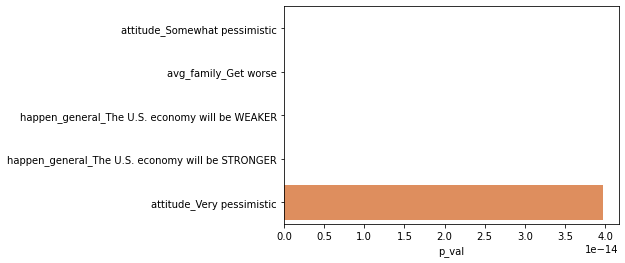

In [82]:
sns.barplot(y = issues_male_responses[0:5].index, x = issues_male_responses[0:5].p_val)

### Key Takeaways

The top five responses that most strongly predicted a pessimistic outlook are exactly the same for men and women. 

## Gender Differences by Response

In [83]:
important_for_females_responses = issues_female_responses[issues_female_responses.p_val < 0.05]
important_for_males_responses = issues_male_responses[issues_male_responses.p_val < 0.05]

In [84]:
important_for_females_responses_list = important_for_females_responses.index.to_list()
important_for_females_responses_list 

['attitude_Somewhat pessimistic',
 'avg_family_Get worse',
 'happen_general_The U.S. economy will be WEAKER',
 'happen_general_The U.S. economy will be STRONGER',
 'attitude_Very pessimistic',
 'happen_pub_ed_The public education system will GET WORSE',
 'job_security_Less job security',
 'happen_pub_ed_The public education system will IMPROVE',
 'happen_race_Race relations will IMPROVE',
 'attitude_Very optimistic',
 'elder_care_LESS prepared financially for retirement than older adults today',
 'worry_government_Very worried',
 'worry_leaders_Very worried',
 'job_benefits_Not as good as they are now',
 'job_benefits_Better than they are now',
 'happen_politics_The country will be MORE politically divided',
 'happen_health_Health care will be MORE affordable',
 'happen_usa_The U.S. will be LESS important in the world',
 'happen_child_f2_Children will have a WORSE standard of living',
 'envir_50yrs_Worse than it is now',
 'happen_usa_The U.S. will be MORE important in the world',
 'env

In [85]:
important_for_males_responses_list = important_for_males_responses.index.to_list()
important_for_males_responses_list 

['attitude_Somewhat pessimistic',
 'avg_family_Get worse',
 'happen_general_The U.S. economy will be WEAKER',
 'happen_general_The U.S. economy will be STRONGER',
 'attitude_Very pessimistic',
 'happen_pub_ed_The public education system will GET WORSE',
 'happen_politics_The country will be MORE politically divided',
 'happen_pub_ed_The public education system will IMPROVE',
 'happen_politics_The country will be LESS politically divided',
 'debt_30yrs_Grow larger',
 'happen_race_Race relations will IMPROVE',
 'job_security_Less job security',
 'attitude_Very optimistic',
 'happen_usa_The U.S. will be LESS important in the world',
 'happen_wealthgap_The gap between the rich and the poor will GET SMALLER',
 'happen_wealthgap_The gap between the rich and the poor will GROW',
 'happen_usa_The U.S. will be MORE important in the world',
 'share_americans_in_lower_class_Increase',
 'elder_care_LESS prepared financially for retirement than older adults today',
 'worry_economy_Not too worried',

In [86]:
important_for_females_but_not_males_responses = set(important_for_females_responses_list).difference(set(important_for_males_responses_list))
important_for_females_but_not_males_responses

{'age_50-64',
 'age_impact_A very bad thing',
 'ethnic_conflict_Not much of an impact',
 'ethnic_impact1_A very bad thing',
 'family_income_three_categories_<$30,000',
 'fut_abortion_Legal with no restrictions',
 'fut_marriage_Less likely to get married than people are now',
 'gov_in_wash_A very negative impact',
 'happen_alzheimers_Will probably happen',
 'happen_rel_Religion will be ABOUT AS important as it is now',
 'happen_rel_Religion will become LESS important',
 'harass_fired_f1_Not a problem',
 'harass_personal_exp_Yes',
 'hispanic_or_latino_Yes',
 'legal_immigration_levels_Maintained at current levels',
 'marital_status_Living with a partner',
 'military_A very negative impact',
 'priority_avoid_tax_increase_Should not be done',
 'priority_reduce_military_A top priority',
 'race_Black or African American',
 'race_and_ethnicity_Hispanic',
 'race_and_ethnicity_White non-Hispanic',
 'religion_Nothing in particular',
 'state_local_A very positive impact',
 'worry_climate_Very worr

In [87]:
important_for_males_but_not_females_responses = set(important_for_males_responses_list).difference(set(important_for_females_responses_list))
important_for_males_but_not_females_responses

{'age_impact_A somewhat good thing',
 'automation_good_or_bad_Mostly hurt American workers',
 'church_attendance_Never',
 'church_attendance_Once a week',
 'debt_30yrs_Be reduced',
 'ethnic_customs_Strengthen American customs and values',
 'family_income_nine_categories_Less than $10,000',
 'happen_70yr_labor_Will definitely not happen',
 'happen_alzheimers_Will definitely happen',
 'happen_anti_semitism_Will definitely not happen',
 'happen_anti_semitism_Will probably not happen',
 'happen_terroist_Will definitely not happen',
 'happen_terroist_Will probably happen',
 'highest_education_six_categories_Postgraduate',
 'inter_mar_A somewhat good thing',
 'pop_growth_Minor problem',
 'priority_reducing_spending_infrastructure_An important, but not a top priority',
 'registered_to_vote_You are NOT registered to vote at your current address',
 'rel_groups_A very positive impact',
 'replacement_by_robots_good_or_bad_A very bad thing for the country',
 'sci_tech_A somewhat positive impact',


### Key Takeaways

Different reponses weres stastically significant in predicting pessimism for females than males. 

Responses that were significant to women but not to men included topics such as ethnic conflict, abortion, religion, harassment, and general worries about the future. 

Respones that were significant to men but not to women were church attendance, terrorism, and science/technology. 

# Modeling by Gender

In [34]:
pd.set_option('display.max_colwidth', None)

## Female

In [89]:
females = e.generate_and_return_obj(females_df)
females.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
2041  201801133729  0.706203                         0                   1   
271         605493  1.106863                         1                   0   
1956  201801124344  0.194872                         1                   0   
221         317005  1.005385                         0                   0   
719   201501623519  0.322398                         0                   0   

      language_Spanish  form_Form 2  \
2041                 0            0   
271                  0            1   
1956                 0            1   
221                  0            1   
719                  0            1   

      happen_general_The U.S. economy will be STRONGER  \
2041                                                 1   
271                                                  0   
1956                                                 0   
221                                                  0   
719                                                  0   

      happen_general_The U.S. economy will be WEAKER  \
2041                                               0   
271                                                1   
1956                                               1   
221                                                1   
719                                                1   

      happen_health_Health care will be MORE affordable  \
2041                                                  0   
271                                                   1   
1956                                                  0   
221                                                   0   
719                                                   0   

      happen_health_Refused  ...  \
2041                      0  ...   
271                       0  ...   
1956                      0  ...   
221                       0  ...   
719                       0  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
2041                                                                          0   
271                                                                           0   
1956                                                                          1   
221                                                                           0   
719                                                                           0   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
2041                                                                                                   0   
271                                                                                                    1   
1956                                                                                                   0   
221                                                                                                    0   
719                                                                                                    0   

      political_views_Liberal  political_views_Moderate  \
2041                        0                         0   
271                         0                         0   
1956                        0                         1   
221                         0                         0   
719                         0                         1   

      political_views_Refused  political_views_Very conservative  \
2041                        0                                  0   
271                         0                                  0   
1956                        0                                  0   
221                         0                                  0   
719                         0                                  0   

      political_views_Very liberal  internet_access_Non Internet User  \
2041                             0                                 

In [90]:
print(f'Baseline Accuracy: {round((1 - females.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 56.9%


In [91]:
# Create a dataframe to store and compare our models' performances
score_df_female = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_female

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [92]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [93]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_female = m.test_a_model(females.X_train_dummies, females.y_train_dummies, females.X_validate_dummies, females.y_validate_dummies, model, name, score_df_female)

In [94]:
score_df_female.sort_values(by = "validate_score", ascending = False).head(10)

model_name  \
47  including_all_features_random_forest_min_samples_leaf_7_depth_7   
1   including_all_features_random_forest_min_samples_leaf_3_depth_1   
42  including_all_features_random_forest_min_samples_leaf_7_depth_2   
30  including_all_features_random_forest_min_samples_leaf_6_depth_0   
44  including_all_features_random_forest_min_samples_leaf_7_depth_4   
11  including_all_features_random_forest_min_samples_leaf_4_depth_1   
60  including_all_features_random_forest_min_samples_leaf_9_depth_0   
56  including_all_features_random_forest_min_samples_leaf_8_depth_6   
33  including_all_features_random_forest_min_samples_leaf_6_depth_3   
13  including_all_features_random_forest_min_samples_leaf_4_depth_3   

    train_score  validate_score  
47     0.775484        0.777778  
1      0.752258        0.774775  
42     0.851613        0.774775  
30     0.797419        0.771772  
44     0.873548        0.771772  
11     0.775484        0.768769  
60     0.830968        0.768769  
56     0.762581        0.768769  
33     0.860645        0.768769  
13     0.816774        0.768769

### Feature Importance

In [95]:
#Make model
rf_depth_5_leaf_5 = RandomForestClassifier(min_samples_leaf=5, max_depth=5)
#Fit Model
rf_depth_5_leaf_5.fit(females.X_train_dummies, females.y_train_dummies)

RandomForestClassifier(max_depth=5, min_samples_leaf=5)

In [96]:
#Create data frame of feature importances, using our selected model
feature_importances_females = pd.DataFrame(rf_depth_5_leaf_5.feature_importances_, index = females.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_females = feature_importances_females.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_females.columns.names = ['category']

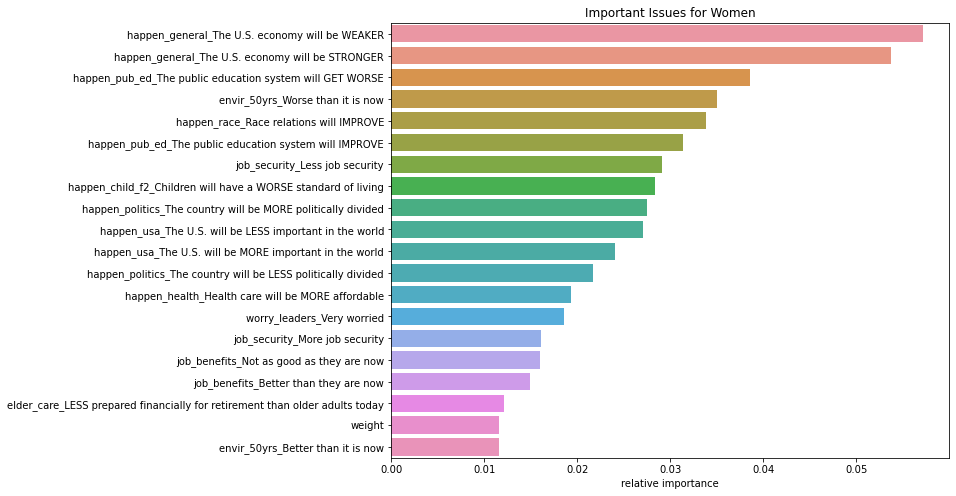

In [98]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances_females = sns.barplot(x=feature_importances_females['relative importance'][0:20], y=feature_importances_females.index[0:20]).set(title="Important Issues for Women")

## Males

In [99]:
males = e.generate_and_return_obj(males_df)
males.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
1986  201801127686  2.234676                         0                   0   
75          169864  0.490990                         0                   0   
705   201501618307  2.765590                         0                   1   
224         319198  0.236477                         1                   0   
605   201501192451  0.630844                         1                   0   

      language_Spanish  form_Form 2  \
1986                 0            0   
75                   0            0   
705                  0            0   
224                  0            0   
605                  0            0   

      happen_general_The U.S. economy will be STRONGER  \
1986                                                 0   
75                                                   1   
705                                                  0   
224                                                  0   
605                                                  1   

      happen_general_The U.S. economy will be WEAKER  \
1986                                               1   
75                                                 0   
705                                                1   
224                                                1   
605                                                0   

      happen_health_Health care will be MORE affordable  \
1986                                                  0   
75                                                    0   
705                                                   0   
224                                                   1   
605                                                   1   

      happen_health_Refused  ...  \
1986                      0  ...   
75                        0  ...   
705                       0  ...   
224                       0  ...   
605                       0  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
1986                                                                          0   
75                                                                            0   
705                                                                           0   
224                                                                           0   
605                                                                           0   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
1986                                                                                                   0   
75                                                                                                     0   
705                                                                                                    0   
224                                                                                                    0   
605                                                                                                    0   

      political_views_Liberal  political_views_Moderate  \
1986                        0                         1   
75                          0                         0   
705                         0                         1   
224                         1                         0   
605                         0                         0   

      political_views_Refused  political_views_Very conservative  \
1986                        0                                  0   
75                          0                                  0   
705                         0                                  0   
224                         0                                  0   
605                         0                                  0   

      political_views_Very liberal  internet_access_Non Internet User  \
1986                             0                                 

In [100]:
print(f'Baseline Accuracy: {round(1.00 - males.y_train_dummies.mean(), 4)* 100}%')

Baseline Accuracy: 54.36%


In [101]:
# Create a dataframe to store and compare our models' performances
score_df_male = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_male

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [102]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [103]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_male = m.test_a_model(males.X_train_dummies, males.y_train_dummies, males.X_validate_dummies, males.y_validate_dummies, model, name, score_df_male)

In [104]:
score_df_male.sort_values(by = "validate_score", ascending = False).head(10)

model_name  \
37  including_all_features_random_forest_min_samples_leaf_6_depth_7   
21  including_all_features_random_forest_min_samples_leaf_5_depth_1   
14  including_all_features_random_forest_min_samples_leaf_4_depth_4   
41  including_all_features_random_forest_min_samples_leaf_7_depth_1   
25  including_all_features_random_forest_min_samples_leaf_5_depth_5   
35  including_all_features_random_forest_min_samples_leaf_6_depth_5   
8   including_all_features_random_forest_min_samples_leaf_3_depth_8   
49  including_all_features_random_forest_min_samples_leaf_7_depth_9   
11  including_all_features_random_forest_min_samples_leaf_4_depth_1   
7   including_all_features_random_forest_min_samples_leaf_3_depth_7   

    train_score  validate_score  
37     0.795563        0.793358  
21     0.852615        0.785978  
14     0.887480        0.785978  
41     0.876387        0.782288  
25     0.903328        0.782288  
35     0.900158        0.782288  
8      0.947702        0.782288  
49     0.847861        0.782288  
11     0.816165        0.782288  
7      0.942948        0.778598

### Feature Importance

In [105]:
#Make model
rf_depth_4_leaf_5 = RandomForestClassifier(min_samples_leaf=5, max_depth=4)
#Fit Model
rf_depth_4_leaf_5.fit(males.X_train_dummies, males.y_train_dummies)

RandomForestClassifier(max_depth=4, min_samples_leaf=5)

In [106]:
#Create data frame of feature importances, using our selected model
feature_importances_males = pd.DataFrame(rf_depth_4_leaf_5.feature_importances_, index = males.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_males = feature_importances_males.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_males.columns.names = ['category']

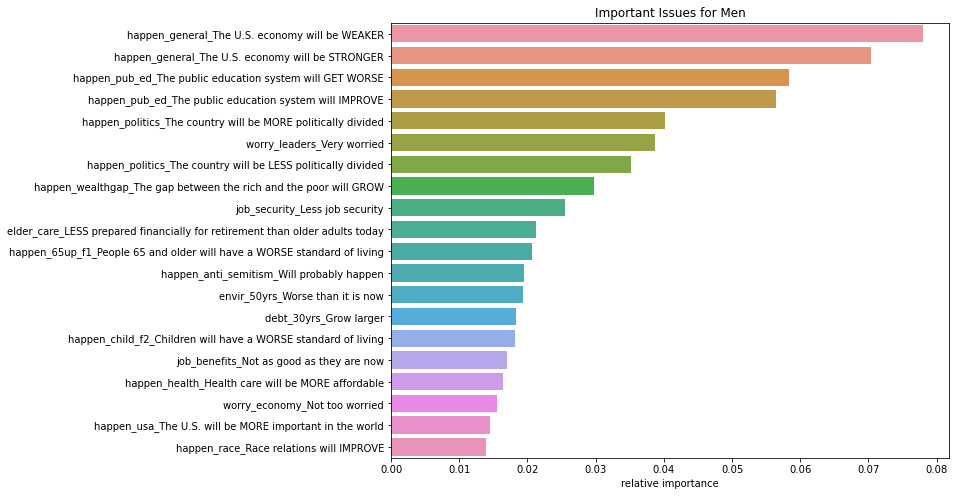

In [107]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances_males = sns.barplot(x=feature_importances_males['relative importance'][0:20], y=feature_importances_males.index[0:20]).set(title="Important Issues for Men")

## Male/Female Side by Side Comparison

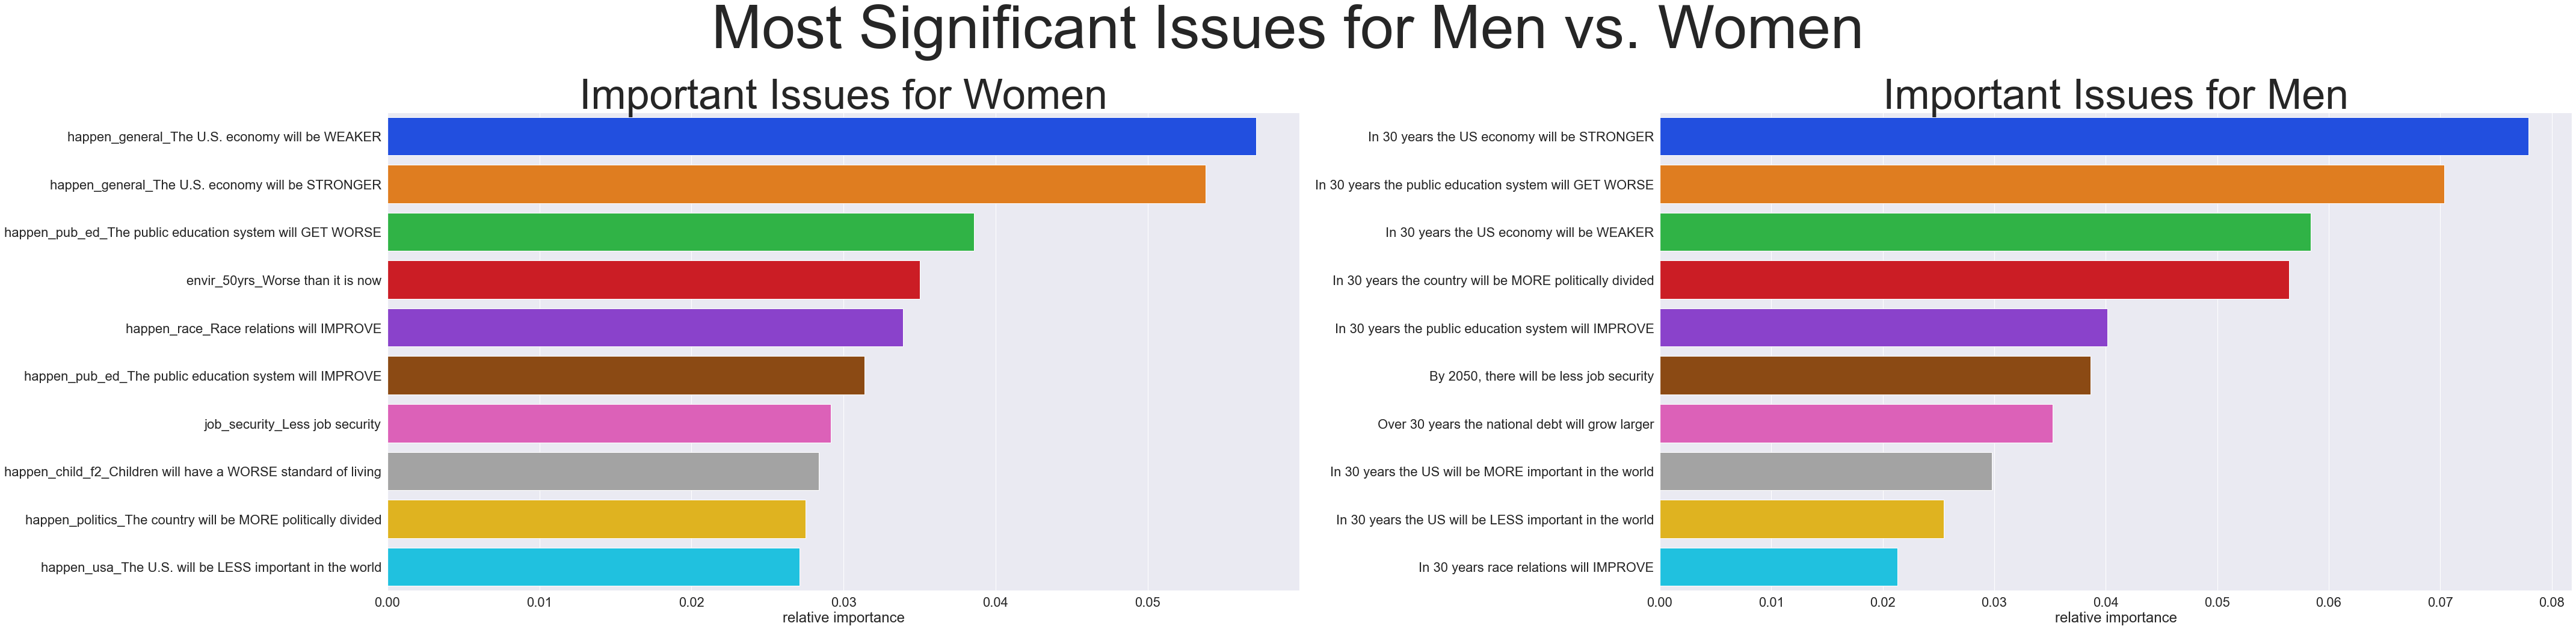

<Figure size 720x576 with 0 Axes>

In [114]:
sns.set(font_scale = 2)
sns.set_palette("bright")

fig, axs = plt.subplots(ncols=2, figsize = (60, 15))
fig.suptitle('Most Significant Issues for Men vs. Women', fontsize = 100)

#Create subplots
relative_importances_females = sns.barplot(x=feature_importances_females['relative importance'][0:10], y=feature_importances_females.index[0:10], ax = axs[0])
relative_importances_females.set_title("Important Issues for Women", fontsize = 70)


#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances_males = sns.barplot(x=feature_importances_males['relative importance'][0:10], y=feature_importances_males.index[0:10], ax = axs[1])
relative_importances_males.set_title("Important Issues for Men", fontsize = 70)
relative_importances_males.set_yticklabels( ('In 30 years the US economy will be STRONGER', 
                                                 'In 30 years the public education system will GET WORSE',
                                                 'In 30 years the US economy will be WEAKER', 
                                                'In 30 years the country will be MORE politically divided', 
                                                'In 30 years the public education system will IMPROVE',
                                                'By 2050, there will be less job security',
                                                'Over 30 years the national debt will grow larger',
                                                'In 30 years the US will be MORE important in the world',
                                                'In 30 years the US will be LESS important in the world',
                                               'In 30 years race relations will IMPROVE') )


#Adjust formatting
fig.tight_layout()

### Key Takeaway

There is significant overlap in the most important issues for men and the most important issues for women. Both gender place large significant on the economy and the education system. Race relations and job security are also important issues for both genders. 

Men are slightly more pessismistic than women on average. 

# Republican / Democrat Split

In [132]:
republican_dataframe = df[df.summary_of_political_party_data == ' Rep/Lean Rep']

In [133]:
democrats_dataframe = df[df.summary_of_political_party_data == "Dem/Lean Dem"]

In [134]:
#Make Dummies 
republicans_dummies = pd.get_dummies(republican_dataframe , drop_first = True)
democrats_dummies = pd.get_dummies(democrats_dataframe, drop_first = True)

# Train, Validate, Test Split

In [135]:
train_r, validate_r, test_r = p.train_validate_test_split(republican_dataframe, 'is_pes')

In [136]:
train_d, validate_d, test_d = p.train_validate_test_split(democrats_dataframe, 'is_pes')

In [137]:
train_r_dummies, validate_r_dummies, test_r_dummies = p.train_validate_test_split(republicans_dummies, 'is_pes')

In [138]:
train_d_dummies, validate_d_dummies, test_d_dummies = p.train_validate_test_split(democrats_dummies, 'is_pes')

# Explore by Question

## Republican Importance by Question

In [139]:
# Generate object
obj_r = e.generate_and_return_obj(train_r)
# Examine the chi2 results and return the most signficant values from them
issues_republicans = obj_r.chi2_df.sort_values(by='p_val')
issues_republicans.head(10)

chi2         p_val deg_free  \
happen_general    89.032197  4.644126e-20        2   
happen_pub_ed     61.656802  4.086914e-14        2   
happen_child_f2   52.212427  4.594260e-12        2   
happen_race       52.205487  4.610229e-12        2   
happen_usa        43.700822  3.239567e-10        2   
happen_health     41.761143  8.544427e-10        2   
debt_30yrs        41.105837  6.209789e-09        3   
happen_politics   35.369083  2.087859e-08        2   
worry_morals      40.602561  3.248416e-08        4   
worry_government  37.168319  4.239107e-08        3   

                                                                                                                                                                                                                  expected_freq  
happen_general                                                                                          [[11.99074074074074, 9.00925925925926], [87.36111111111111, 65.63888888888889], [85.64814814814815, 64.35185185185185]]  
happen_pub_ed                                                                                       [[15.987654320987655, 12.012345679012345], [104.49074074074075, 78.50925925925925], [64.52160493827161, 48.47839506172839]]  
happen_child_f2                                                                                    [[39.903614457831324, 32.096385542168676], [47.10843373493976, 37.89156626506024], [4.9879518072289155, 4.0120481927710845]]  
happen_race                                                                                          [[74.22839506172839, 55.77160493827161], [94.78395061728395, 71.21604938271605], [15.987654320987655, 12.012345679012345]]  
happen_usa                                                                                           [[14.274691358024691, 10.725308641975309], [94.21296296296296, 70.78703703703704], [76.51234567901234, 57.48765432098765]]  
happen_health                                                                                          [[101.6358024691358, 76.3641975308642], [70.23148148148148, 52.76851851851852], [13.132716049382717, 9.867283950617283]]  
debt_30yrs                                               [[2.2839506172839505, 1.7160493827160495], [30.262345679012345, 22.737654320987655], [111.91358024691358, 84.08641975308642], [40.54012345679013, 30.459876543209877]]  
happen_politics                                                                                      [[11.419753086419753, 8.580246913580247], [47.96296296296296, 36.03703703703704], [125.61728395061728, 94.38271604938272]]  
worry_morals      [[59.382716049382715, 44.617283950617285], [5.138888888888889, 3.861111111111111], [21.69753086419753, 16.30246913580247], [0.5709876543209876, 0.42901234567901236], [98.20987654320987, 73.79012345679013]]  
worry_government                                             [[73.6574074074074, 55.342592592592595], [3.425925925925926, 2.574074074074074], [22.839506172839506, 17.160493827160494], [85.07716049382717, 63.92283950617284]]

## Democrat Explore by Question

In [140]:
# Generate object
obj_d = e.generate_and_return_obj(train_d)
# Examine the chi2 results and return the most signficant values from them
issues_democrats = obj_d.chi2_df.sort_values(by='p_val')
issues_democrats.head(10)

chi2         p_val deg_free  \
happen_pub_ed    101.242246  1.036396e-22        2   
happen_general    91.107389  1.645439e-20        2   
job_security      64.968128  5.095389e-14        3   
happen_child_f2   53.912035  1.964041e-12        2   
happen_politics   52.770391  3.475804e-12        2   
job_benefits      52.023583  2.960617e-11        3   
happen_health     45.097735  1.611207e-10        2   
envir_50yrs       48.196756  1.933758e-10        3   
happen_energy     49.577578  4.423812e-10        4   
happen_race       42.030385  7.468234e-10        2   

                                                                                                                                                                                                                expected_freq  
happen_pub_ed                                                                                       [[19.61320754716981, 16.38679245283019], [114.41037735849056, 95.58962264150944], [96.97641509433963, 81.02358490566037]]  
happen_general                                                                                       [[17.97877358490566, 15.02122641509434], [81.72169811320755, 68.27830188679245], [131.2995283018868, 109.7004716981132]]  
job_security                                              [[78.99764150943396, 66.00235849056604], [114.95518867924528, 96.04481132075472], [33.778301886792455, 28.221698113207548], [3.268867924528302, 2.731132075471698]]  
happen_child_f2                                                                                        [[44.37735849056604, 39.62264150943396], [60.22641509433962, 53.77358490566038], [7.39622641509434, 6.60377358490566]]  
happen_politics                                                                                                        [[17.433962264150942, 14.566037735849056], [69.19103773584905, 57.80896226415094], [144.375, 120.625]]  
job_benefits                                                 [[84.99056603773585, 71.00943396226415], [53.39150943396226, 44.60849056603774], [89.89386792452831, 75.10613207547169], [2.724056603773585, 2.275943396226415]]  
happen_health                                                                                      [[125.30660377358491, 104.69339622641509], [86.08018867924528, 71.91981132075472], [19.61320754716981, 16.38679245283019]]  
envir_50yrs                                                [[32.1438679245283, 26.8561320754717], [33.23349056603774, 27.766509433962263], [0.5448113207547169, 0.455188679245283], [165.07783018867926, 137.92216981132074]]  
happen_energy    [[0.5448113207547169, 0.455188679245283], [63.742924528301884, 53.257075471698116], [3.268867924528302, 2.731132075471698], [108.41745283018868, 90.58254716981132], [55.02594339622642, 45.97405660377358]]  
happen_race                                                                                        [[89.34905660377359, 74.65094339622641], [119.85849056603773, 100.14150943396227], [21.79245283018868, 18.20754716981132]]

### Key Takeways

There is significant overlap in the most important issues for Republicans and Democrats. 

# Explore by Response

## Republican Explore by Response

In [141]:
# Generate object
obj_r = e.generate_and_return_obj(train_r_dummies)
# Examine the chi2 results and return the most signficant values from them
issues_republicans = obj_r.chi2_df.sort_values(by='p_val')
issues_republicans.head(10)

chi2  \
attitude_Somewhat pessimistic                             191.935319   
avg_family_Get worse                                       82.486800   
happen_general_The U.S. economy will be WEAKER             81.684383   
happen_general_The U.S. economy will be STRONGER           81.450106   
happen_pub_ed_The public education system will IMPROVE     56.728452   
attitude_Very pessimistic                                  54.685152   
happen_pub_ed_The public education system will GET WORSE   52.459832   
happen_race_Race relations will IMPROVE                    41.584617   
happen_usa_The U.S. will be LESS important in the world    41.564586   
debt_30yrs_Grow larger                                     39.619955   

                                                                 p_val  \
attitude_Somewhat pessimistic                             1.201998e-43   
avg_family_Get worse                                      1.063782e-19   
happen_general_The U.S. economy will be WEAKER            1.596501e-19   
happen_general_The U.S. economy will be STRONGER          1.797426e-19   
happen_pub_ed_The public education system will IMPROVE    5.003437e-14   
attitude_Very pessimistic                                 1.414711e-13   
happen_pub_ed_The public education system will GET WORSE  4.391391e-13   
happen_race_Race relations will IMPROVE                   1.128779e-10   
happen_usa_The U.S. will be LESS important in the world   1.140405e-10   
debt_30yrs_Grow larger                                    3.085147e-10   

                                                         deg_free  \
attitude_Somewhat pessimistic                                   1   
avg_family_Get worse                                            1   
happen_general_The U.S. economy will be WEAKER                  1   
happen_general_The U.S. economy will be STRONGER                1   
happen_pub_ed_The public education system will IMPROVE          1   
attitude_Very pessimistic                                       1   
happen_pub_ed_The public education system will GET WORSE        1   
happen_race_Race relations will IMPROVE                         1   
happen_usa_The U.S. will be LESS important in the world         1   
debt_30yrs_Grow larger                                          1   

                                                                                                                               expected_freq  
attitude_Somewhat pessimistic                              [[127.33024691358025, 95.66975308641975], [57.66975308641975, 43.33024691358025]]  
avg_family_Get worse                                       [[113.05555555555556, 84.94444444444444], [71.94444444444444, 54.05555555555556]]  
happen_general_The U.S. economy will be WEAKER              [[99.35185185185185, 74.64814814814815], [85.64814814814815, 64.35185185185185]]  
happen_general_The U.S. economy will be STRONGER            [[97.63888888888889, 73.36111111111111], [87.36111111111111, 65.63888888888889]]  
happen_pub_ed_The public education system will IMPROVE     [[120.47839506172839, 90.52160493827161], [64.52160493827161, 48.47839506172839]]  
attitude_Very pessimistic                                 [[163.30246913580248, 122.69753086419753], [21.69753086419753, 16.30246913580247]]  
happen_pub_ed_The public education system will GET WORSE   [[80.50925925925925, 60.49074074074074], [104.49074074074075, 78.50925925925925]]  
happen_race_Race relations will IMPROVE                     [[90.21604938271605, 67.78395061728395], [94.78395061728395, 71.21604938271605]]  
happen_usa_The U.S. will be LESS important in the world     [[90.78703703703704, 68.21296296296296], [94.21296296296296, 70.78703703703704]]  
debt_30yrs_Grow larger                                     [[73.08641975308642, 54.91358024691358], [111.91358024691358, 84.08641975308642]]

## Democrat Explore by Response

In [142]:
# Generate object
obj_d = e.generate_and_return_obj(train_d_dummies)
# Examine the chi2 results and return the most signficant values from them
issues_democrats = obj_d.chi2_df.sort_values(by='p_val')
issues_democrats.head(10)

chi2  \
attitude_Somewhat pessimistic                                 244.251131   
happen_pub_ed_The public education system will GET WORSE       98.607022   
avg_family_Get worse                                           94.204325   
happen_general_The U.S. economy will be STRONGER               83.410687   
happen_general_The U.S. economy will be WEAKER                 81.317152   
happen_pub_ed_The public education system will IMPROVE         77.402221   
attitude_Very pessimistic                                      71.568795   
job_security_Less job security                                 56.256941   
happen_politics_The country will be MORE politically divided   49.353018   
envir_50yrs_Worse than it is now                               46.501274   

                                                                     p_val  \
attitude_Somewhat pessimistic                                 4.653741e-55   
happen_pub_ed_The public education system will GET WORSE      3.079253e-23   
avg_family_Get worse                                          2.845783e-22   
happen_general_The U.S. economy will be STRONGER              6.666064e-20   
happen_general_The U.S. economy will be WEAKER                1.922508e-19   
happen_pub_ed_The public education system will IMPROVE        1.394583e-18   
attitude_Very pessimistic                                     2.677578e-17   
job_security_Less job security                                6.359294e-14   
happen_politics_The country will be MORE politically divided  2.138053e-12   
envir_50yrs_Worse than it is now                              9.155890e-12   

                                                             deg_free  \
attitude_Somewhat pessimistic                                       1   
happen_pub_ed_The public education system will GET WORSE            1   
avg_family_Get worse                                                1   
happen_general_The U.S. economy will be STRONGER                    1   
happen_general_The U.S. economy will be WEAKER                      1   
happen_pub_ed_The public education system will IMPROVE              1   
attitude_Very pessimistic                                           1   
job_security_Less job security                                      1   
happen_politics_The country will be MORE politically divided        1   
envir_50yrs_Worse than it is now                                    1   

                                                                                                                                     expected_freq  
attitude_Somewhat pessimistic                                   [[155.27122641509433, 129.72877358490567], [75.72877358490567, 63.27122641509434]]  
happen_pub_ed_The public education system will GET WORSE        [[116.58962264150944, 97.41037735849056], [114.41037735849056, 95.58962264150944]]  
avg_family_Get worse                                            [[128.0306603773585, 106.96933962264151], [102.96933962264151, 86.03066037735849]]  
happen_general_The U.S. economy will be STRONGER                [[149.27830188679246, 124.72169811320755], [81.72169811320755, 68.27830188679245]]  
happen_general_The U.S. economy will be WEAKER                      [[99.7004716981132, 83.2995283018868], [131.2995283018868, 109.7004716981132]]  
happen_pub_ed_The public education system will IMPROVE          [[134.02358490566039, 111.97641509433963], [96.97641509433963, 81.02358490566037]]  
attitude_Very pessimistic                                     [[201.58018867924528, 168.41981132075472], [29.419811320754718, 24.580188679245282]]  
job_security_Less job security                                  [[116.04481132075472, 96.95518867924528], [114.95518867924528, 96.04481132075472]]  
happen_politics_The country will be MORE politically divided                                                [[86.625, 72.375], [144.375, 120.625]]  
envir_50yrs_Worse than it is now                                [[65.922169811

### Key Takeaway

There is overlap, but the most important issue for Republicans seems to be the economy, whereas the most important issues for Democrats seems to be the public education system. 

# Modeling

## Republican

In [143]:
republicans = e.generate_and_return_obj(republican_dataframe)
republicans.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
1795  201801105856  1.338218                         1                   0   
748   201501652886  1.182982                         0                   1   
2210  201801150341  1.076449                         0                   0   
1447  201801057730  1.931583                         0                   1   
86          184778  0.313910                         0                   0   

      language_Spanish  form_Form 2  \
1795                 0            1   
748                  0            0   
2210                 0            1   
1447                 0            1   
86                   0            1   

      happen_general_The U.S. economy will be STRONGER  \
1795                                                 1   
748                                                  0   
2210                                                 1   
1447                                                 1   
86                                                   0   

      happen_general_The U.S. economy will be WEAKER  \
1795                                               0   
748                                                0   
2210                                               0   
1447                                               0   
86                                                 1   

      happen_health_Health care will be MORE affordable  \
1795                                                  0   
748                                                   0   
2210                                                  0   
1447                                                  1   
86                                                    0   

      happen_health_Refused  ...  \
1795                      0  ...   
748                       1  ...   
2210                      1  ...   
1447                      0  ...   
86                        0  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
1795                                                                          0   
748                                                                           0   
2210                                                                          0   
1447                                                                          1   
86                                                                            0   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
1795                                                                                                   0   
748                                                                                                    0   
2210                                                                                                   0   
1447                                                                                                   0   
86                                                                                                     1   

      political_views_Liberal  political_views_Moderate  \
1795                        0                         0   
748                         0                         1   
2210                        0                         1   
1447                        0                         1   
86                          0                         0   

      political_views_Refused  political_views_Very conservative  \
1795                        0                                  0   
748                         0                                  0   
2210                        0                                  0   
1447                        0                                  0   
86                          0                                  0   

      political_views_Very liberal  internet_access_Non Internet User  \
1795                             0                                 

In [144]:
print(f'Baseline Accuracy: {round(1.00 - republicans.y_train_dummies.mean(), 4)* 100}%')

Baseline Accuracy: 57.34%


In [145]:
# Create a dataframe to store and compare our models' performances
score_df_republican = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_republican

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [146]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [147]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_republican = m.test_a_model(republicans.X_train_dummies, republicans.y_train_dummies, republicans.X_validate_dummies, republicans.y_validate_dummies, model, name, score_df_republican)

In [148]:
score_df_republican.sort_values(by = "validate_score", ascending = False).head(10)

model_name  \
14  including_all_features_random_forest_min_samples_leaf_4_depth_4   
44  including_all_features_random_forest_min_samples_leaf_7_depth_4   
25  including_all_features_random_forest_min_samples_leaf_5_depth_5   
34  including_all_features_random_forest_min_samples_leaf_6_depth_4   
16  including_all_features_random_forest_min_samples_leaf_4_depth_6   
15  including_all_features_random_forest_min_samples_leaf_4_depth_5   
62  including_all_features_random_forest_min_samples_leaf_9_depth_2   
22  including_all_features_random_forest_min_samples_leaf_5_depth_2   
32  including_all_features_random_forest_min_samples_leaf_6_depth_2   
12  including_all_features_random_forest_min_samples_leaf_4_depth_2   

    train_score  validate_score  
14     0.884283        0.791165  
44     0.875648        0.787149  
25     0.892919        0.787149  
34     0.891192        0.787149  
16     0.917098        0.787149  
15     0.892919        0.787149  
62     0.856649        0.787149  
22     0.849741        0.783133  
32     0.863558        0.783133  
12     0.832470        0.783133

### Feature Engineering

In [149]:
#Make model
rf_depth_7_leaf_4 = RandomForestClassifier(min_samples_leaf=4, max_depth=7)
#Fit Model
rf_depth_7_leaf_4.fit(republicans.X_train_dummies, republicans.y_train_dummies)

RandomForestClassifier(max_depth=7, min_samples_leaf=4)

In [152]:
#Create data frame of feature importances, using our selected model
feature_importances_republicans = pd.DataFrame(rf_depth_7_leaf_4.feature_importances_, index = republicans.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_republicans = feature_importances_republicans.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_republicans.columns.names = ['category']

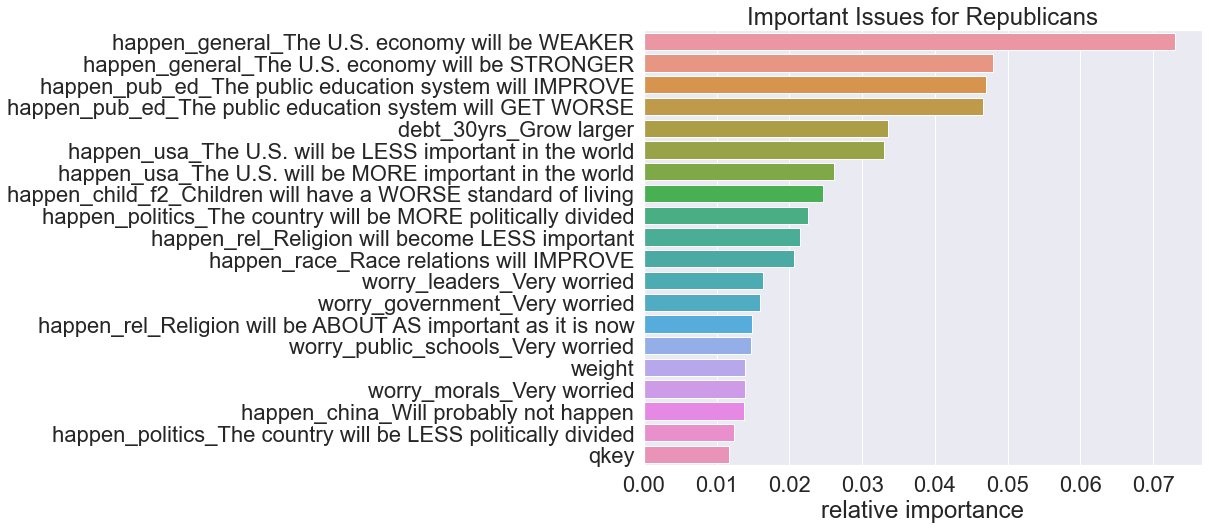

In [153]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances_republicans = sns.barplot(x=feature_importances_republicans['relative importance'][0:20], y=feature_importances_republicans.index[0:20]).set(title="Important Issues for Republicans")

## Democratic

In [154]:
democrats = e.generate_and_return_obj(democrats_dataframe)
democrats.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
42          140165  0.648885                         0                   0   
2415  201801175380  1.962519                         0                   1   
1403  201801050789  1.204143                         1                   0   
2511  201801188088  0.836139                         0                   0   
955   201701614857  0.562429                         0                   0   

      language_Spanish  form_Form 2  \
42                   0            1   
2415                 0            1   
1403                 0            1   
2511                 0            1   
955                  0            0   

      happen_general_The U.S. economy will be STRONGER  \
42                                                   1   
2415                                                 1   
1403                                                 0   
2511                                                 0   
955                                                  0   

      happen_general_The U.S. economy will be WEAKER  \
42                                                 0   
2415                                               0   
1403                                               1   
2511                                               1   
955                                                1   

      happen_health_Health care will be MORE affordable  \
42                                                    0   
2415                                                  1   
1403                                                  0   
2511                                                  0   
955                                                   0   

      happen_health_Refused  ...  \
42                        0  ...   
2415                      0  ...   
1403                      1  ...   
2511                      1  ...   
955                       0  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
42                                                                            0   
2415                                                                          0   
1403                                                                          0   
2511                                                                          0   
955                                                                           0   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
42                                                                                                     0   
2415                                                                                                   0   
1403                                                                                                   0   
2511                                                                                                   0   
955                                                                                                    0   

      political_views_Liberal  political_views_Moderate  \
42                          1                         0   
2415                        0                         0   
1403                        1                         0   
2511                        1                         0   
955                         1                         0   

      political_views_Refused  political_views_Very conservative  \
42                          0                                  0   
2415                        0                                  0   
1403                        0                                  0   
2511                        0                                  0   
955                         0                                  0   

      political_views_Very liberal  internet_access_Non Internet User  \
42                               0                                 

In [155]:
print(f'Baseline Accuracy: {round(1.00 - democrats.y_train_dummies.mean(), 4)* 100}%')

Baseline Accuracy: 54.49%


In [156]:
# Create a dataframe to store and compare our models' performances
score_df_democrat = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_democrat

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [157]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [158]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_democrat = m.test_a_model(democrats.X_train_dummies, democrats.y_train_dummies, democrats.X_validate_dummies, democrats.y_validate_dummies, model, name, score_df_democrat)

In [159]:
score_df_democrat.sort_values(by = 'validate_score', ascending = False).head()

model_name  \
7   including_all_features_random_forest_min_samples_leaf_3_depth_7   
8   including_all_features_random_forest_min_samples_leaf_3_depth_8   
49  including_all_features_random_forest_min_samples_leaf_7_depth_9   
3   including_all_features_random_forest_min_samples_leaf_3_depth_3   
30  including_all_features_random_forest_min_samples_leaf_6_depth_0   

    train_score  validate_score  
7      0.923483        0.800613  
8      0.940633        0.797546  
49     0.815303        0.797546  
3      0.816623        0.794479  
30     0.821900        0.794479

### Feature Engineering 

In [160]:
#Make model
rf_depth_6_leaf_7 = RandomForestClassifier(min_samples_leaf=7, max_depth=6)
#Fit Model
rf_depth_6_leaf_7.fit(democrats.X_train_dummies, democrats.y_train_dummies)

RandomForestClassifier(max_depth=6, min_samples_leaf=7)

In [161]:
#Create data frame of feature importances, using our selected model
feature_importances_democrats = pd.DataFrame(rf_depth_6_leaf_7.feature_importances_, index = democrats.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_democrats = feature_importances_democrats.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_democrats.columns.names = ['category']

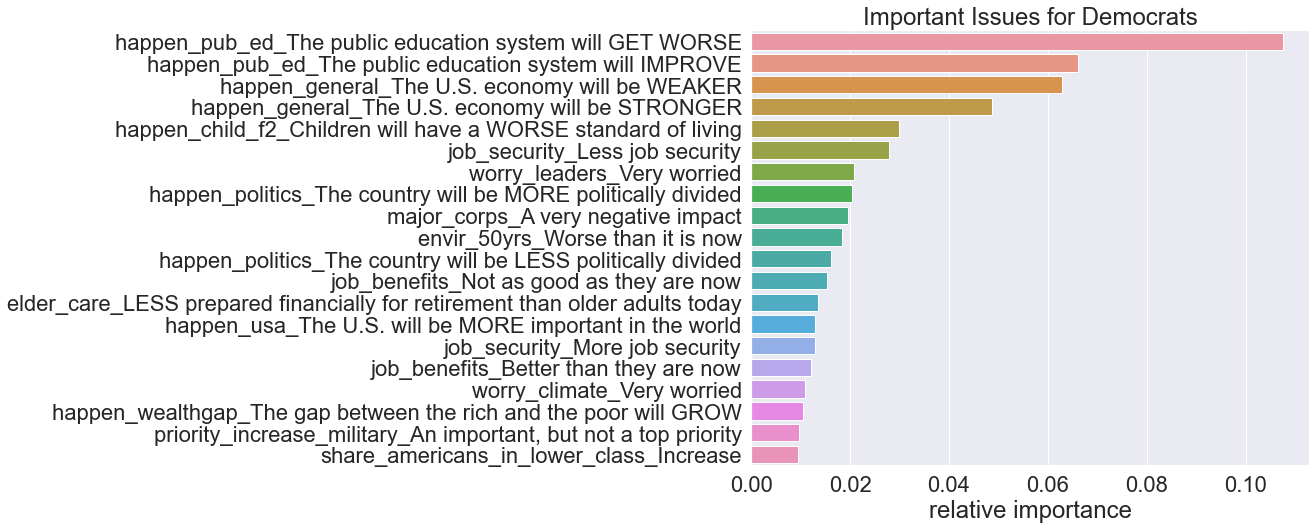

In [162]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_democrats = sns.barplot(x=feature_importances_democrats['relative importance'][0:20], y=feature_importances_democrats.index[0:20]).set(title="Important Issues for Democrats")

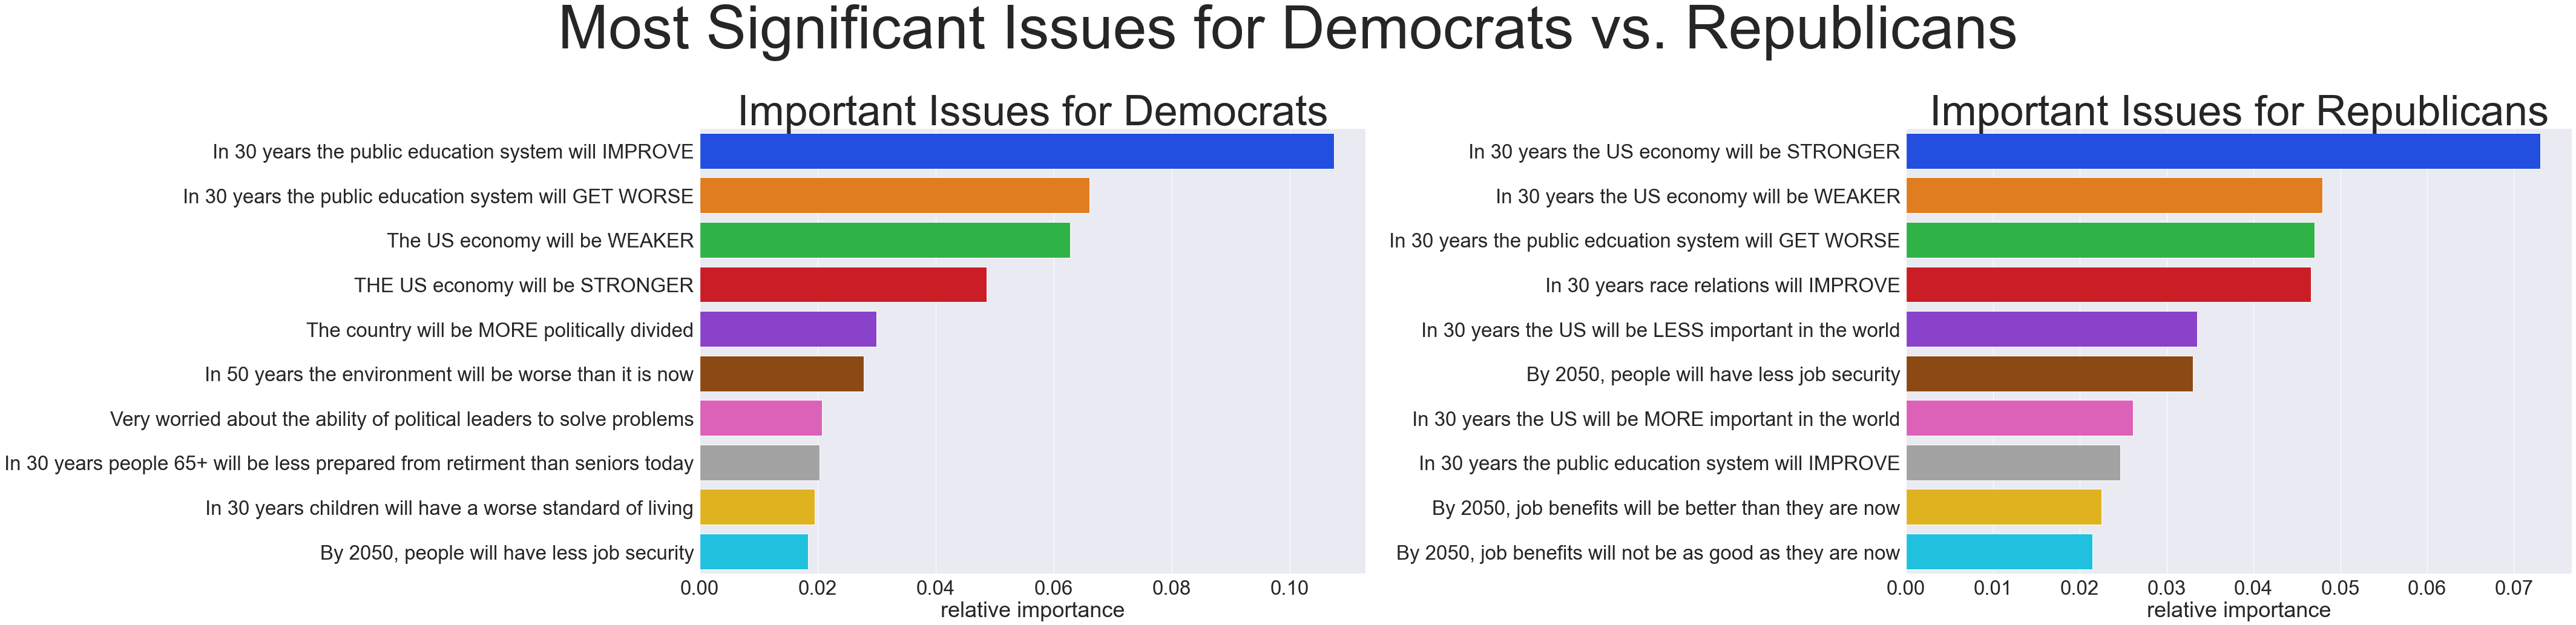

<Figure size 720x576 with 0 Axes>

In [165]:
sns.set(font_scale = 3)
sns.set_palette("bright")

fig, axs = plt.subplots(ncols=2, figsize = (60, 15))
fig.suptitle('Most Significant Issues for Democrats vs. Republicans', fontsize = 100)

#Create subplots

relative_importances_democrats = sns.barplot(x=feature_importances_democrats['relative importance'][0:10], y=feature_importances_democrats.index[0:10], ax = axs[0])
relative_importances_democrats.set_title("Important Issues for Democrats", fontsize = 70)
relative_importances_democrats.set_yticklabels( ('In 30 years the public education system will IMPROVE', 
                                                 'In 30 years the public education system will GET WORSE',
                                                 'The US economy will be WEAKER', 
                                                'THE US economy will be STRONGER', 
                                                'The country will be MORE politically divided', 
                                                'In 50 years the environment will be worse than it is now',
                                                'Very worried about the ability of political leaders to solve problems',
                                                'In 30 years people 65+ will be less prepared from retirment than seniors today',
                                                'In 30 years children will have a worse standard of living',
                                                'By 2050, people will have less job security') )

#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances_republicans = sns.barplot(x=feature_importances_republicans['relative importance'][0:10], y=feature_importances_republicans.index[0:10], ax = axs[1])
relative_importances_republicans.set_title("Important Issues for Republicans", fontsize = 70)
relative_importances_republicans.set_yticklabels( ('In 30 years the US economy will be STRONGER', 
                                                 'In 30 years the US economy will be WEAKER',
                                                 'In 30 years the public edcuation system will GET WORSE', 
                                                'In 30 years race relations will IMPROVE', 
                                                   'In 30 years the US will be LESS important in the world',
                                                'By 2050, people will have less job security', 
                                                'In 30 years the US will be MORE important in the world',
                                                'In 30 years the public education system will IMPROVE',
                                                'By 2050, job benefits will be better than they are now',
                                                'By 2050, job benefits will not be as good as they are now') )

#Adjust formatting
fig.tight_layout()

### Key Takeaways

Again, the main difference seems to be that Democrats place top priority on education, whereas Republicans place top priority on the economy.

Democrats are slighlty more pessimistic than Republicans on average.

# Split by Income Level Three Categories

In [7]:
df.family_income_three_categories.value_counts()

$30-$74,999           927
$75,000+              771
<$30,000              707
Don't know/Refused    110
Name: family_income_three_categories, dtype: int64

In [8]:
thirty_to_sevthirty_to_seventy_fiveenty_five = df[df.family_income_three_categories == '$30-$74,999']
less_than_thirty = df[df.family_income_three_categories == '<$30,000']
over_seventy_five = df[df.family_income_three_categories == '$75,000+']

In [9]:
#Make Dummies 
thirty_to_seventy_five_dummies = pd.get_dummies(thirty_to_seventy_five , drop_first = True)
less_than_thirty_dummies = pd.get_dummies(less_than_thirty, drop_first = True)
over_seventy_five_dummies = pd.get_dummies(over_seventy_five, drop_first = True)

## Train/Test Split

In [13]:
train_middle, validate_middle, test_middle = p.train_validate_test_split(thirty_to_seventy_five, 'is_pes')
train_middle_dummies, validate_middle_dummies, test_middle_dummies = p.train_validate_test_split(thirty_to_seventy_five_dummies, 'is_pes')

In [14]:
train_lower, validate_lower, test_lower = p.train_validate_test_split(less_than_thirty, 'is_pes')
train_lower_dummies, validate_lower_dummies, test_lower_dummies = p.train_validate_test_split(less_than_thirty_dummies, 'is_pes')

In [15]:
train_high, validate_high, test_high= p.train_validate_test_split(over_seventy_five, 'is_pes')
train_high_dummies, validate_high_dummies, test_high_dummies = p.train_validate_test_split(over_seventy_five_dummies, 'is_pes')

## Middle Class Explore

In [16]:
# Generate object
obj_middle = e.generate_and_return_obj(train_middle)
# Examine the chi2 results and return the most signficant values from them
issues_middle = obj_middle.chi2_df.sort_values(by='p_val')
issues_middle.head(10)

chi2         p_val deg_free  \
happen_general                   55.208079  1.027349e-12        2   
happen_child_f2                  46.788833  6.917260e-11        2   
happen_pub_ed                    45.062959  1.639467e-10        2   
share_americans_in_middle_class  33.864761  2.115797e-07        3   
job_benefits                     31.413222  6.956973e-07        3   
major_corps                      29.800606  5.373856e-06        4   
happen_china                     27.953692  1.274539e-05        4   
happen_usa                       22.320794  1.422660e-05        2   
happen_health                    22.282177  1.450397e-05        2   
happen_65up_f1                   22.029342  1.645846e-05        2   

                                                                     expected_freq  
happen_general                   [[17.162629757785467, 14.837370242214533], [52...  
happen_child_f2                  [[27.055944055944057, 25.944055944055943], [37...  
happen_pub_ed                    [[14.480968858131488, 12.519031141868512], [85...  
share_americans_in_middle_class  [[67.04152249134948, 57.95847750865052], [43.9...  
job_benefits                     [[52.56055363321799, 45.43944636678201], [26.8...  
major_corps                      [[50.951557093425606, 44.048442906574394], [70...  
happen_china                     [[1.6089965397923875, 1.3910034602076125], [14...  
happen_usa                       [[13.408304498269896, 11.591695501730104], [96...  
happen_health                    [[90.1038062283737, 77.8961937716263], [51.487...  
happen_65up_f1                   [[23.589041095890412, 18.410958904109588], [52...

In [17]:
# Generate object
obj_middle = e.generate_and_return_obj(train_middle_dummies)
# Examine the chi2 results and return the most signficant values from them
issues_middle = obj_middle.chi2_df.sort_values(by='p_val')
issues_middle.head(10)

chi2         p_val  \
attitude_Somewhat pessimistic                       179.022695  7.921526e-41   
avg_family_Get worse                                 79.917456  3.903824e-19   
happen_general_The U.S. economy will be WEAKER       48.380715  3.510031e-12   
happen_general_The U.S. economy will be STRONGER     47.106852  6.722028e-12   
happen_pub_ed_The public education system will ...   40.312009  2.164742e-10   
attitude_Very pessimistic                            39.233858  3.759637e-10   
happen_pub_ed_The public education system will ...   38.698792  4.945151e-10   
happen_child_f2_Children will have a WORSE stan...   34.553055  4.147900e-09   
job_benefits_Not as good as they are now             24.698030  6.705268e-07   
avg_family_Stay about the same                       23.829941  1.052328e-06   

                                                   deg_free  \
attitude_Somewhat pessimistic                             1   
avg_family_Get worse                                      1   
happen_general_The U.S. economy will be WEAKER            1   
happen_general_The U.S. economy will be STRONGER          1   
happen_pub_ed_The public education system will ...        1   
attitude_Very pessimistic                                 1   
happen_pub_ed_The public education system will ...        1   
happen_child_f2_Children will have a WORSE stan...        1   
job_benefits_Not as good as they are now                  1   
avg_family_Stay about the same                            1   

                                                                                        expected_freq  
attitude_Somewhat pessimistic                       [[100.29411764705883, 86.70588235294117], [54....  
avg_family_Get worse                                [[86.88581314878893, 75.11418685121107], [68.1...  
happen_general_The U.S. economy will be WEAKER      [[69.18685121107266, 59.813148788927336], [85....  
happen_general_The U.S. economy will be STRONGER    [[102.9757785467128, 89.0242214532872], [52.02...  
happen_pub_ed_The public education system will ...  [[69.72318339100346, 60.27681660899654], [85.2...  
attitude_Very pessimistic                           [[137.83737024221455, 119.16262975778547], [17...  
happen_pub_ed_The public education system will ...  [[99.75778546712803, 86.24221453287197], [55.2...  
happen_child_f2_Children will have a WORSE stan...  [[115.8477508650519, 100.1522491349481], [39.1...  
job_benefits_Not as good as they are now            [[80.44982698961938, 69.55017301038062], [74.5...  
avg_family_Stay about the same                      [[92.78546712802768, 80.21453287197232], [62.2...

## Lower Explore

In [20]:
# Generate object
obj_lower = e.generate_and_return_obj(train_lower)
# Examine the chi2 results and return the most signficant values from them
issues_lower = obj_lower.chi2_df.sort_values(by='p_val')
issues_lower.head(10)

chi2     p_val deg_free  \
happen_general   27.242868  0.000001        2   
happen_pub_ed    25.301812  0.000003        2   
happen_65up_f1   24.664121  0.000004        2   
happen_usa       23.449350  0.000008        2   
happen_child_f2  23.254025  0.000009        2   
envir_50yrs      21.562507  0.000021        2   
worry_morals     22.855580  0.000043        3   
happen_politics  18.151322  0.000114        2   
happen_china     22.476968  0.000161        4   
happen_health    17.418660  0.000165        2   

                                                     expected_freq  
happen_general   [[16.737556561085974, 10.262443438914028], [49...  
happen_pub_ed    [[18.597285067873305, 11.402714932126697], [65...  
happen_65up_f1   [[23.321100917431192, 17.678899082568808], [29...  
happen_usa       [[22.316742081447963, 13.683257918552036], [74...  
happen_child_f2  [[32.142857142857146, 15.857142857142858], [33...  
envir_50yrs      [[30.995475113122172, 19.004524886877828], [30...  
worry_morals     [[50.83257918552036, 31.167420814479637], [4.3...  
happen_politics  [[17.357466063348415, 10.642533936651583], [32...  
happen_china     [[1.8597285067873304, 1.1402714932126696], [14...  
happen_health    [[70.0497737556561, 42.95022624434389], [52.07...

In [21]:
# Generate object
obj_lower = e.generate_and_return_obj(train_lower_dummies)
# Examine the chi2 results and return the most signficant values from them
issues_lower = obj_lower.chi2_df.sort_values(by='p_val')
issues_lower.head(10)

chi2         p_val  \
attitude_Somewhat pessimistic                       130.738486  2.824726e-30   
avg_family_Get worse                                 59.255584  1.384669e-14   
attitude_Very pessimistic                            41.009651  1.514794e-10   
happen_general_The U.S. economy will be WEAKER       25.385344  4.694714e-07   
happen_pub_ed_The public education system will ...   23.827909  1.053439e-06   
attitude_Very optimistic                             23.617332  1.175242e-06   
happen_65up_f1_People 65 and older will have a ...   23.174189  1.479702e-06   
happen_usa_The U.S. will be LESS important in t...   22.074427  2.622807e-06   
worry_morals_Very worried                            20.554848  5.794684e-06   
happen_general_The U.S. economy will be STRONGER     18.478314  1.718486e-05   

                                                   deg_free  \
attitude_Somewhat pessimistic                             1   
avg_family_Get worse                                      1   
attitude_Very pessimistic                                 1   
happen_general_The U.S. economy will be WEAKER            1   
happen_pub_ed_The public education system will ...        1   
attitude_Very optimistic                                  1   
happen_65up_f1_People 65 and older will have a ...        1   
happen_usa_The U.S. will be LESS important in t...        1   
worry_morals_Very worried                                 1   
happen_general_The U.S. economy will be STRONGER          1   

                                                                                        expected_freq  
attitude_Somewhat pessimistic                       [[99.8054298642534, 61.19457013574661], [37.19...  
avg_family_Get worse                                [[81.2081447963801, 49.79185520361991], [55.79...  
attitude_Very pessimistic                           [[122.12217194570135, 74.87782805429865], [14....  
happen_general_The U.S. economy will be WEAKER      [[66.33031674208145, 40.66968325791855], [70.6...  
happen_pub_ed_The public education system will ...  [[71.90950226244344, 44.09049773755656], [65.0...  
attitude_Very optimistic                            [[115.30316742081448, 70.69683257918552], [21....  
happen_65up_f1_People 65 and older will have a ...  [[104.76470588235294, 64.23529411764706], [32....  
happen_usa_The U.S. will be LESS important in t...  [[62.61085972850679, 38.38914027149321], [74.3...  
worry_morals_Very worried                           [[79.34841628959276, 48.65158371040724], [57.6...  
happen_general_The U.S. economy will be STRONGER    [[87.40723981900453, 53.59276018099548], [49.5...

## Higher Explore

In [23]:
# Generate object
obj_high = e.generate_and_return_obj(train_high)
# Examine the chi2 results and return the most signficant values from them
issues_high = obj_high.chi2_df.sort_values(by='p_val')
issues_high.head(10)

chi2         p_val deg_free  \
happen_general    84.882826  3.697673e-19        2   
happen_pub_ed     61.992809  3.454878e-14        2   
happen_child_f2   57.815730  2.789162e-13        2   
happen_race       51.352663  7.061727e-12        2   
happen_health     44.636321  2.029299e-10        2   
worry_leaders     43.079126  4.420654e-10        2   
happen_politics   42.805519  5.068736e-10        2   
debt_30yrs        37.872608  3.007561e-08        3   
worry_government  36.669733  5.404502e-08        3   
job_security      34.309837  1.704154e-07        3   

                                                      expected_freq  
happen_general    [[5.775, 5.225], [59.85, 54.15], [60.375, 54.6...  
happen_pub_ed     [[5.25, 4.75], [69.825, 63.175], [50.925, 46.0...  
happen_child_f2   [[30.0, 29.0], [27.45762711864407, 26.54237288...  
happen_race        [[46.725, 42.275], [73.5, 66.5], [5.775, 5.225]]  
happen_health          [[72.45, 65.55], [49.35, 44.65], [4.2, 3.8]]  
worry_leaders              [[58.8, 53.2], [8.4, 7.6], [58.8, 53.2]]  
happen_politics   [[5.775, 5.225], [36.75, 33.25], [83.475, 75.5...  
debt_30yrs        [[0.525, 0.475], [13.65, 12.35], [84.525, 76.4...  
worry_government  [[49.35, 44.65], [14.7, 13.3], [0.525, 0.475],...  
job_security      [[48.3, 43.7], [67.2, 60.8], [8.925, 8.075], [...

In [24]:
# Generate object
obj_high = e.generate_and_return_obj(train_high_dummies)
# Examine the chi2 results and return the most signficant values from them
issues_high = obj_high.chi2_df.sort_values(by='p_val')
issues_high.head(10)

chi2         p_val  \
attitude_Somewhat pessimistic                       129.492481  5.291653e-30   
avg_family_Get worse                                 84.796018  3.307899e-20   
happen_general_The U.S. economy will be STRONGER     80.443213  2.991804e-19   
happen_general_The U.S. economy will be WEAKER       76.826152  1.866890e-18   
happen_pub_ed_The public education system will ...   58.156592  2.420617e-14   
happen_pub_ed_The public education system will ...   56.653016  5.199105e-14   
happen_race_Race relations will IMPROVE              42.964554  5.574068e-11   
happen_child_f2_Children will have a WORSE stan...   41.654674  1.089047e-10   
attitude_Very pessimistic                            41.362916  1.264333e-10   
worry_leaders_Very worried                           39.640843  3.052325e-10   

                                                   deg_free  \
attitude_Somewhat pessimistic                             1   
avg_family_Get worse                                      1   
happen_general_The U.S. economy will be STRONGER          1   
happen_general_The U.S. economy will be WEAKER            1   
happen_pub_ed_The public education system will ...        1   
happen_pub_ed_The public education system will ...        1   
happen_race_Race relations will IMPROVE                   1   
happen_child_f2_Children will have a WORSE stan...        1   
attitude_Very pessimistic                                 1   
worry_leaders_Very worried                                1   

                                                                           expected_freq  
attitude_Somewhat pessimistic                               [[84.0, 76.0], [42.0, 38.0]]  
avg_family_Get worse                                        [[75.6, 68.4], [50.4, 45.6]]  
happen_general_The U.S. economy will be STRONGER        [[66.15, 59.85], [59.85, 54.15]]  
happen_general_The U.S. economy will be WEAKER      [[65.625, 59.375], [60.375, 54.625]]  
happen_pub_ed_The public education system will ...  [[56.175, 50.825], [69.825, 63.175]]  
happen_pub_ed_The public education system will ...  [[75.075, 67.925], [50.925, 46.075]]  
happen_race_Race relations will IMPROVE                     [[52.5, 47.5], [73.5, 66.5]]  
happen_child_f2_Children will have a WORSE stan...      [[97.65, 88.35], [28.35, 25.65]]  
attitude_Very pessimistic                              [[108.15, 97.85], [17.85, 16.15]]  
worry_leaders_Very worried                                  [[67.2, 60.8], [58.8, 53.2]]

## Middle Class Modeling

In [25]:
middle = e.generate_and_return_obj(thirty_to_seventy_five)
middle.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
2282  201801159302  1.240421                         1                   0   
258         601359  0.755072                         0                   0   
1216  201801020976  0.094035                         1                   0   
1718  201801093846  0.224435                         1                   0   
865   201501739549  1.055981                         0                   0   

      language_Spanish  form_Form 2  \
2282                 0            1   
258                  0            0   
1216                 0            0   
1718                 0            0   
865                  0            1   

      happen_general_The U.S. economy will be STRONGER  \
2282                                                 0   
258                                                  0   
1216                                                 0   
1718                                                 1   
865                                                  0   

      happen_general_The U.S. economy will be WEAKER  \
2282                                               1   
258                                                1   
1216                                               1   
1718                                               0   
865                                                1   

      happen_health_Health care will be MORE affordable  \
2282                                                  0   
258                                                   0   
1216                                                  0   
1718                                                  1   
865                                                   0   

      happen_health_Refused  ...  \
2282                      0  ...   
258                       0  ...   
1216                      0  ...   
1718                      0  ...   
865                       0  ...   

      family_income_nine_categories_$50,000 to less than $75,000  \
2282                                                  0            
258                                                   1            
1216                                                  1            
1718                                                  0            
865                                                   0            

      registered_to_vote_You are NOT registered to vote at your current address  \
2282                                                  0                           
258                                                   0                           
1216                                                  0                           
1718                                                  0                           
865                                                   0                           

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
2282                                                  0                                                    
258                                                   0                                                    
1216                                                  0                                                    
1718                                                  0                                                    
865                                                   0                                                    

      political_views_Liberal  political_views_Moderate  \
2282                        0                         1   
258                         0                         0   
1216                        1                         0   
1718                        0                         1   
865                         0                         0   

      political_views_Refused  political_views_Very conservative  \
2282                        0                                  0   
258 

In [28]:
print(f'Baseline Accuracy: {round((1.00 - middle.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 53.67%


In [36]:
# Create a dataframe to store and compare our models' performances
score_df_middle = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_middle

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [37]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [38]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_middle = m.test_a_model(middle.X_train_dummies, middle.y_train_dummies, middle.X_validate_dummies, middle.y_validate_dummies, model, name, score_df_middle)

In [39]:
score_df_middle.sort_values(by = 'validate_score', ascending = False).head()

model_name  \
33  including_all_features_random_forest_min_samples_leaf_6_depth_3   
62  including_all_features_random_forest_min_samples_leaf_9_depth_2   
6   including_all_features_random_forest_min_samples_leaf_3_depth_6   
30  including_all_features_random_forest_min_samples_leaf_6_depth_0   
44  including_all_features_random_forest_min_samples_leaf_7_depth_4   

    train_score  validate_score  
33     0.857143        0.757848  
62     0.845560        0.753363  
6      0.901544        0.748879  
30     0.818533        0.748879  
44     0.859073        0.748879

In [40]:
#Make model
rf_depth_3_leaf_6 = RandomForestClassifier(min_samples_leaf=6, max_depth=3)
#Fit Model
rf_depth_3_leaf_6.fit(middle.X_train_dummies, middle.y_train_dummies)

RandomForestClassifier(max_depth=3, min_samples_leaf=6)

In [43]:
#Create data frame of feature importances, using our selected model
feature_importances_middle = pd.DataFrame(rf_depth_3_leaf_6.feature_importances_, index = middle.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_middle = feature_importances_middle.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_middle.columns.names = ['category']

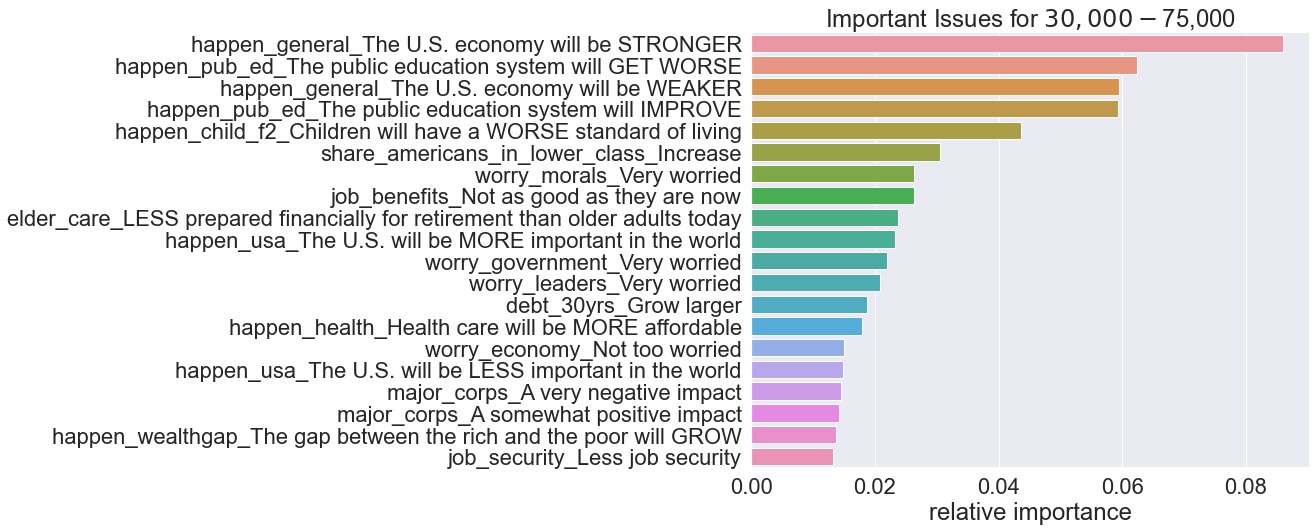

In [45]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_middle = sns.barplot(x=feature_importances_middle['relative importance'][0:20], y=feature_importances_middle.index[0:20]).set(title="Important Issues for $30,000 - $75,000")

## Lower Class Modeling

In [46]:
lower = e.generate_and_return_obj(less_than_thirty)
lower.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
2142  201801143133  1.228268                         0                   0   
1889  201801117002  1.871323                         1                   0   
2216  201801150960  3.233378                         1                   0   
2328  201801165317  2.003515                         0                   0   
988   201701644999  2.940783                         1                   0   

      language_Spanish  form_Form 2  \
2142                 0            1   
1889                 0            1   
2216                 0            1   
2328                 0            0   
988                  0            0   

      happen_general_The U.S. economy will be STRONGER  \
2142                                                 0   
1889                                                 1   
2216                                                 0   
2328                                                 1   
988                                                  0   

      happen_general_The U.S. economy will be WEAKER  \
2142                                               1   
1889                                               0   
2216                                               1   
2328                                               0   
988                                                0   

      happen_health_Health care will be MORE affordable  \
2142                                                  0   
1889                                                  0   
2216                                                  0   
2328                                                  1   
988                                                   1   

      happen_health_Refused  ...  \
2142                      0  ...   
1889                      0  ...   
2216                      1  ...   
2328                      0  ...   
988                       0  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
2142                                                                          0   
1889                                                                          0   
2216                                                                          1   
2328                                                                          1   
988                                                                           0   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
2142                                                                                                   1   
1889                                                                                                   0   
2216                                                                                                   0   
2328                                                                                                   0   
988                                                                                                    1   

      political_views_Liberal  political_views_Moderate  \
2142                        0                         1   
1889                        0                         1   
2216                        0                         0   
2328                        0                         1   
988                         1                         0   

      political_views_Refused  political_views_Very conservative  \
2142                        0                                  0   
1889                        0                                  0   
2216                        1                                  0   
2328                        0                                  0   
988                         0                                  0   

      political_views_Very liberal  internet_access_Non Internet User  \
2142                             0                                 

In [47]:
print(f'Baseline Accuracy: {round((1.00 - lower.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 62.03%


In [53]:
# Create a dataframe to store and compare our models' performances
score_df_lower = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_lower

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [54]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [55]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_lower = m.test_a_model(lower.X_train_dummies, lower.y_train_dummies, lower.X_validate_dummies, lower.y_validate_dummies, model, name, score_df_lower)

In [56]:
score_df_lower.sort_values(by = 'validate_score', ascending = False).head()

model_name  \
49  including_all_features_random_forest_min_samples_leaf_7_depth_9   
14  including_all_features_random_forest_min_samples_leaf_4_depth_4   
41  including_all_features_random_forest_min_samples_leaf_7_depth_1   
16  including_all_features_random_forest_min_samples_leaf_4_depth_6   
39  including_all_features_random_forest_min_samples_leaf_6_depth_9   

    train_score  validate_score  
49     0.827848        0.758824  
14     0.908861        0.752941  
41     0.848101        0.747059  
16     0.934177        0.741176  
39     0.822785        0.735294

In [57]:
#Make model
rf_depth_9_leaf_7 = RandomForestClassifier(min_samples_leaf=7, max_depth=9)
#Fit Model
rf_depth_9_leaf_7.fit(lower.X_train_dummies, lower.y_train_dummies)

RandomForestClassifier(max_depth=9, min_samples_leaf=7)

In [58]:
#Create data frame of feature importances, using our selected model
feature_importances_lower = pd.DataFrame(rf_depth_9_leaf_7.feature_importances_, index = lower.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_lower = feature_importances_lower.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_lower.columns.names = ['category']

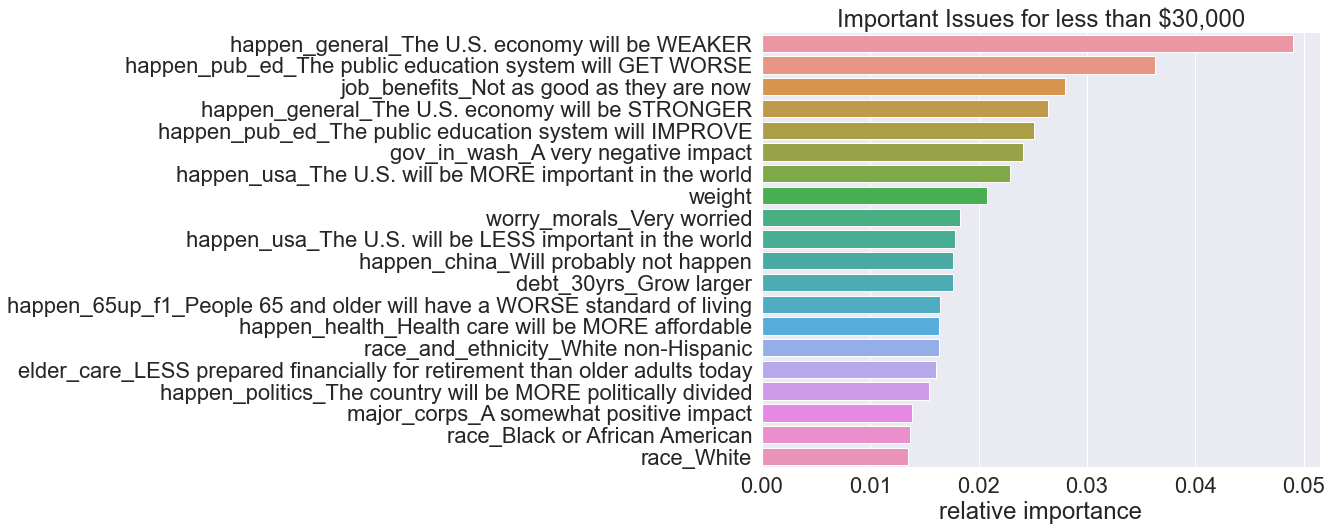

In [59]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_lower = sns.barplot(x=feature_importances_lower['relative importance'][0:20], y=feature_importances_lower.index[0:20]).set(title="Important Issues for less than $30,000")

## Upper Class Modeling

In [61]:
higher = e.generate_and_return_obj(over_seventy_five)
higher.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
466         690094  0.528628                         0                   0   
1221  201801022194  0.256902                         0                   0   
723   201501625871  0.624575                         0                   0   
1607  201801078345  1.164320                         0                   0   
1258  201801027954  0.493122                         1                   0   

      language_Spanish  form_Form 2  \
466                  0            1   
1221                 0            0   
723                  0            0   
1607                 0            1   
1258                 0            1   

      happen_general_The U.S. economy will be STRONGER  \
466                                                  1   
1221                                                 0   
723                                                  0   
1607                                                 1   
1258                                                 0   

      happen_general_The U.S. economy will be WEAKER  \
466                                                0   
1221                                               1   
723                                                1   
1607                                               0   
1258                                               1   

      happen_health_Health care will be MORE affordable  \
466                                                   1   
1221                                                  0   
723                                                   1   
1607                                                  0   
1258                                                  0   

      happen_health_Refused  ...  \
466                       0  ...   
1221                      0  ...   
723                       0  ...   
1607                      0  ...   
1258                      0  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
466                                                                           0   
1221                                                                          0   
723                                                                           0   
1607                                                                          0   
1258                                                                          1   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
466                                                                                                    0   
1221                                                                                                   0   
723                                                                                                    0   
1607                                                                                                   0   
1258                                                                                                   0   

      political_views_Liberal  political_views_Moderate  \
466                         1                         0   
1221                        0                         0   
723                         1                         0   
1607                        0                         1   
1258                        1                         0   

      political_views_Refused  political_views_Very conservative  \
466                         0                                  0   
1221                        0                                  0   
723                         0                                  0   
1607                        0                                  0   
1258                        0                                  0   

      political_views_Very liberal  internet_access_Non Internet User  \
466                              0                                 

In [62]:
print(f'Baseline Accuracy: {round((1.00 - higher.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 52.67%


In [69]:
# Create a dataframe to store and compare our models' performances
score_df_higher = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_higher

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [70]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [71]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_higher = m.test_a_model(higher.X_train_dummies, higher.y_train_dummies, higher.X_validate_dummies, higher.y_validate_dummies, model, name, score_df_higher)

In [72]:
score_df_higher.sort_values(by = 'validate_score', ascending = False).head()

model_name  \
41  including_all_features_random_forest_min_samples_leaf_7_depth_1   
46  including_all_features_random_forest_min_samples_leaf_7_depth_6   
3   including_all_features_random_forest_min_samples_leaf_3_depth_3   
8   including_all_features_random_forest_min_samples_leaf_3_depth_8   
39  including_all_features_random_forest_min_samples_leaf_6_depth_9   

    train_score  validate_score  
41     0.886311        0.832432  
46     0.821346        0.832432  
3      0.867749        0.827027  
8      0.962877        0.827027  
39     0.856148        0.827027

In [74]:
#Make model
rf_depth_1_leaf_7 = RandomForestClassifier(min_samples_leaf=7, max_depth=1)
#Fit Model
rf_depth_1_leaf_7.fit(higher.X_train_dummies, higher.y_train_dummies)

RandomForestClassifier(max_depth=1, min_samples_leaf=7)

In [78]:
#Create data frame of feature importances, using our selected model
feature_importances_higher = pd.DataFrame(rf_depth_1_leaf_7.feature_importances_, index = higher.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_higher = feature_importances_higher.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_higher.columns.names = ['category']

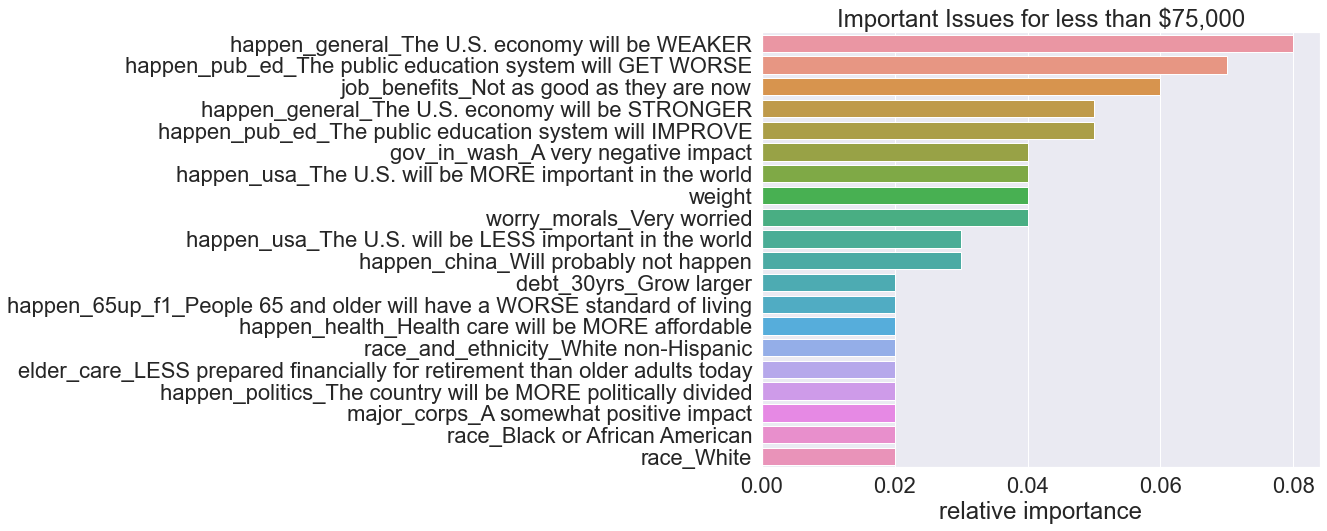

In [79]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_higher = sns.barplot(x=feature_importances_higher['relative importance'][0:20], y=feature_importances_lower.index[0:20]).set(title="Important Issues for less than $75,000")

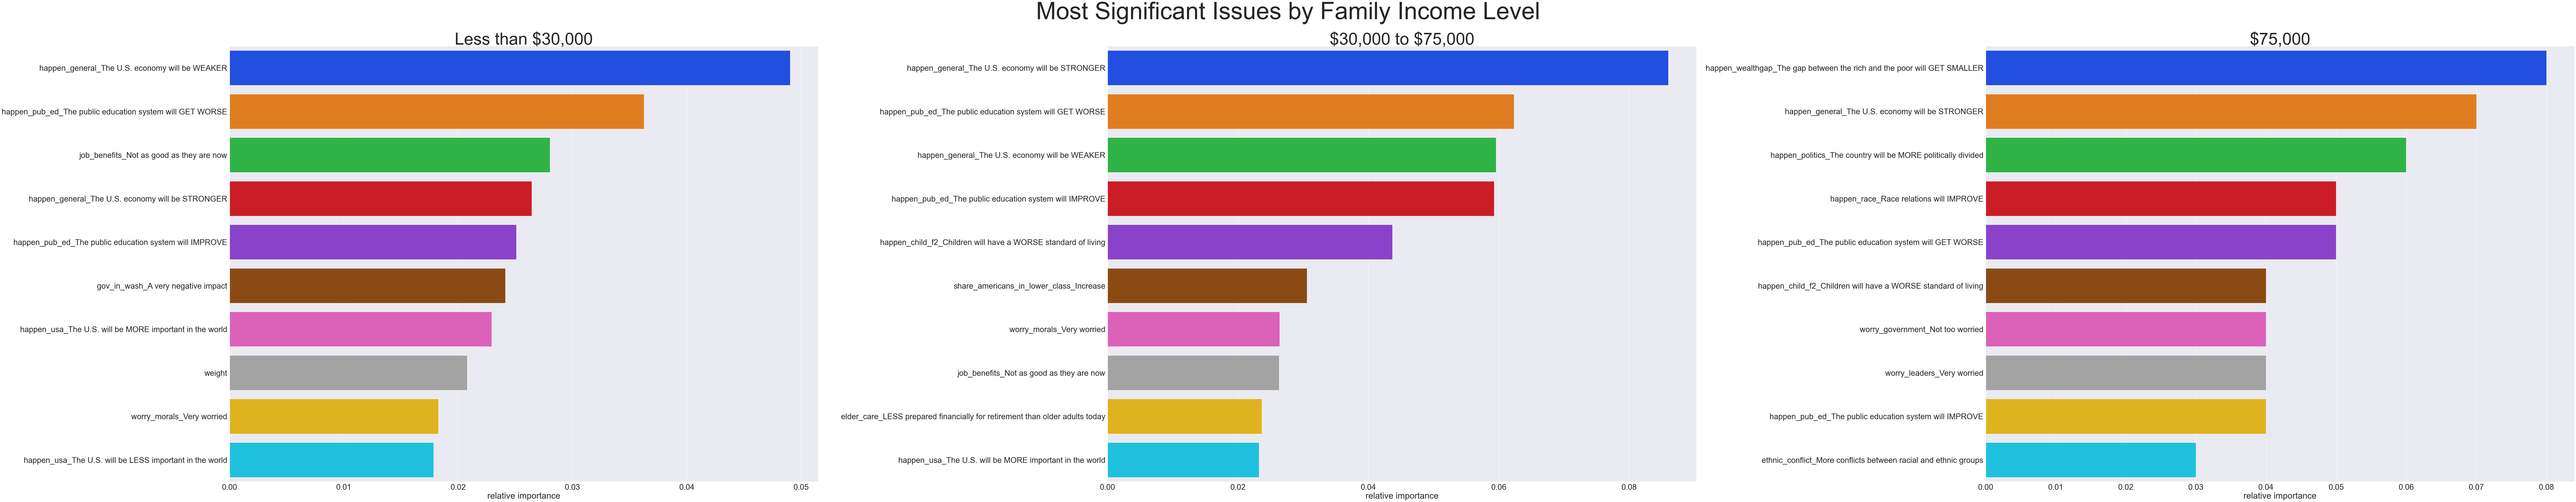

In [90]:
sns.set(font_scale = 3)
sns.set_palette("bright")

fig, axs = plt.subplots(ncols=3, figsize = (150, 30))
fig.suptitle('Most Significant Issues by Family Income Level', fontsize = 100)

#Below 30,000
relative_importances_lower = sns.barplot(x=feature_importances_lower['relative importance'][0:10], y=feature_importances_lower.index[0:10], ax = axs[0])
relative_importances_lower.set_title("Less than \$30,000", fontsize = 70)

#30,000 to 75,000
relative_importances_middle = sns.barplot(x=feature_importances_middle['relative importance'][0:10], y=feature_importances_middle.index[0:10], ax = axs[1])
relative_importances_middle.set_title("\$30,000 to \$75,000", fontsize = 70)

#Over 75,000
relative_importances_higher = sns.barplot(x=feature_importances_higher['relative importance'][0:10], y=feature_importances_higher.index[0:10], ax = axs[2])
relative_importances_higher.set_title("\$75,000", fontsize = 70)


#Adjust formatting
fig.tight_layout()

# Split by Education Level

In [91]:
df.highest_education_three_categories.value_counts()

H.S. graduate or less    940
College graduate+        879
Some College             691
Don't know/Refused         5
Name: highest_education_three_categories, dtype: int64

In [93]:
high_school_df = df[df.highest_education_three_categories == 'H.S. graduate or less']
college_grad_df = df[df.highest_education_three_categories == 'College graduate+']
some_college_df = df[df.highest_education_three_categories == 'Some College']

## High School Education Modeling

In [94]:
high_school = e.generate_and_return_obj(high_school_df)
high_school.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
1380  201801047975  0.289053                         0                   1   
1473  201801061814  1.990948                         1                   0   
2071  201801136631  0.261957                         1                   0   
942   201701605725  2.218166                         1                   0   
2462  201801182559  1.481703                         1                   0   

      language_Spanish  form_Form 2  \
1380                 0            1   
1473                 0            1   
2071                 0            1   
942                  0            1   
2462                 0            1   

      happen_general_The U.S. economy will be STRONGER  \
1380                                                 0   
1473                                                 1   
2071                                                 1   
942                                                  0   
2462                                                 0   

      happen_general_The U.S. economy will be WEAKER  \
1380                                               1   
1473                                               0   
2071                                               0   
942                                                0   
2462                                               1   

      happen_health_Health care will be MORE affordable  \
1380                                                  0   
1473                                                  1   
2071                                                  0   
942                                                   0   
2462                                                  0   

      happen_health_Refused  ...  \
1380                      0  ...   
1473                      0  ...   
2071                      0  ...   
942                       0  ...   
2462                      0  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
1380                                                                          0   
1473                                                                          1   
2071                                                                          0   
942                                                                           0   
2462                                                                          0   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
1380                                                                                                   0   
1473                                                                                                   0   
2071                                                                                                   0   
942                                                                                                    0   
2462                                                                                                   0   

      political_views_Liberal  political_views_Moderate  \
1380                        0                         0   
1473                        0                         0   
2071                        0                         0   
942                         1                         0   
2462                        1                         0   

      political_views_Refused  political_views_Very conservative  \
1380                        0                                  1   
1473                        1                                  0   
2071                        0                                  0   
942                         0                                  0   
2462                        0                                  0   

      political_views_Very liberal  internet_access_Non Internet User  \
1380                             0                                 

In [95]:
print(f'Baseline Accuracy: {round((1.00 - high_school.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 59.32%


In [96]:
# Create a dataframe to store and compare our models' performances
score_df_high_school = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_high_school

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [98]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_high_school = m.test_a_model(high_school.X_train_dummies, high_school.y_train_dummies, high_school.X_validate_dummies, high_school.y_validate_dummies, model, name, score_df_high_school)

In [99]:
score_df_high_school.sort_values(by = 'validate_score', ascending = False).head()

model_name  \
17  including_all_features_random_forest_min_samples_leaf_4_depth_7   
23  including_all_features_random_forest_min_samples_leaf_5_depth_3   
16  including_all_features_random_forest_min_samples_leaf_4_depth_6   
3   including_all_features_random_forest_min_samples_leaf_3_depth_3   
50  including_all_features_random_forest_min_samples_leaf_8_depth_0   

    train_score  validate_score  
17     0.925856        0.774336  
23     0.876426        0.774336  
16     0.918251        0.769912  
3      0.836502        0.765487  
50     0.847909        0.765487

In [100]:
#Make model
rf_depth_7_leaf_4 = RandomForestClassifier(min_samples_leaf=4, max_depth=7)
#Fit Model
rf_depth_7_leaf_4.fit(high_school.X_train_dummies, high_school.y_train_dummies)

RandomForestClassifier(max_depth=7, min_samples_leaf=4)

In [101]:
#Create data frame of feature importances, using our selected model
feature_importances_high_school = pd.DataFrame(rf_depth_7_leaf_4.feature_importances_, index = high_school.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_high_school = feature_importances_high_school.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_high_school.columns.names = ['category']

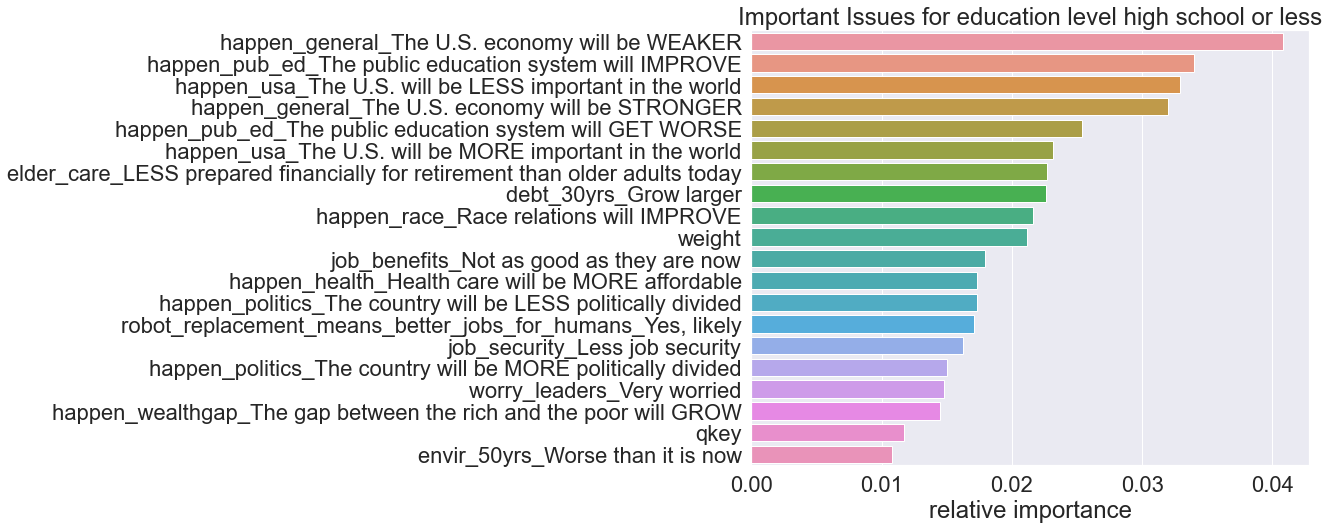

In [102]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_high_school = sns.barplot(x=feature_importances_high_school['relative importance'][0:20], y=feature_importances_high_school.index[0:20]).set(title="Important Issues for education level high school or less")

## College Education Modeling

In [104]:
college = e.generate_and_return_obj(college_grad_df)
college.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
873   201501795432  0.740750                         1                   0   
2124  201801141697  2.300861                         1                   0   
991   201701646732  0.705865                         1                   0   
63          157730  0.250630                         0                   0   
617   201501211143  0.544628                         0                   0   

      language_Spanish  form_Form 2  \
873                  0            1   
2124                 0            1   
991                  0            0   
63                   0            1   
617                  0            0   

      happen_general_The U.S. economy will be STRONGER  \
873                                                  0   
2124                                                 1   
991                                                  1   
63                                                   0   
617                                                  0   

      happen_general_The U.S. economy will be WEAKER  \
873                                                1   
2124                                               0   
991                                                0   
63                                                 1   
617                                                1   

      happen_health_Health care will be MORE affordable  \
873                                                   1   
2124                                                  0   
991                                                   0   
63                                                    0   
617                                                   0   

      happen_health_Refused  ...  \
873                       0  ...   
2124                      0  ...   
991                       0  ...   
63                        0  ...   
617                       0  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
873                                                                           0   
2124                                                                          0   
991                                                                           0   
63                                                                            0   
617                                                                           1   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
873                                                                                                    0   
2124                                                                                                   0   
991                                                                                                    0   
63                                                                                                     0   
617                                                                                                    0   

      political_views_Liberal  political_views_Moderate  \
873                         0                         1   
2124                        0                         0   
991                         0                         1   
63                          0                         1   
617                         0                         0   

      political_views_Refused  political_views_Very conservative  \
873                         0                                  0   
2124                        0                                  1   
991                         0                                  0   
63                          0                                  0   
617                         0                                  0   

      political_views_Very liberal  internet_access_Non Internet User  \
873                              0                                 

In [106]:
print(f'Baseline Accuracy: {round((1.00 - college.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 53.66%


In [109]:
# Create a dataframe to store and compare our models' performances
score_df_college = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_college

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [110]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_college = m.test_a_model(college.X_train_dummies, college.y_train_dummies, college.X_validate_dummies, college.y_validate_dummies, model, name, score_df_college)

In [111]:
score_df_college.sort_values(by = 'validate_score', ascending = False).head()

model_name  \
29  including_all_features_random_forest_min_samples_leaf_5_depth_9   
53  including_all_features_random_forest_min_samples_leaf_8_depth_3   
46  including_all_features_random_forest_min_samples_leaf_7_depth_6   
60  including_all_features_random_forest_min_samples_leaf_9_depth_0   
44  including_all_features_random_forest_min_samples_leaf_7_depth_4   

    train_score  validate_score  
29     0.819106        0.805687  
53     0.871951        0.800948  
46     0.808943        0.800948  
60     0.861789        0.800948  
44     0.871951        0.800948

In [112]:
#Make model
rf_depth_9_leaf_5 = RandomForestClassifier(min_samples_leaf=5, max_depth=9)
#Fit Model
rf_depth_9_leaf_5.fit(college.X_train_dummies, college.y_train_dummies)

RandomForestClassifier(max_depth=9, min_samples_leaf=5)

In [114]:
#Create data frame of feature importances, using our selected model
feature_importances_college = pd.DataFrame(rf_depth_9_leaf_5 .feature_importances_, index = college.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_college = feature_importances_college.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_college.columns.names = ['category']

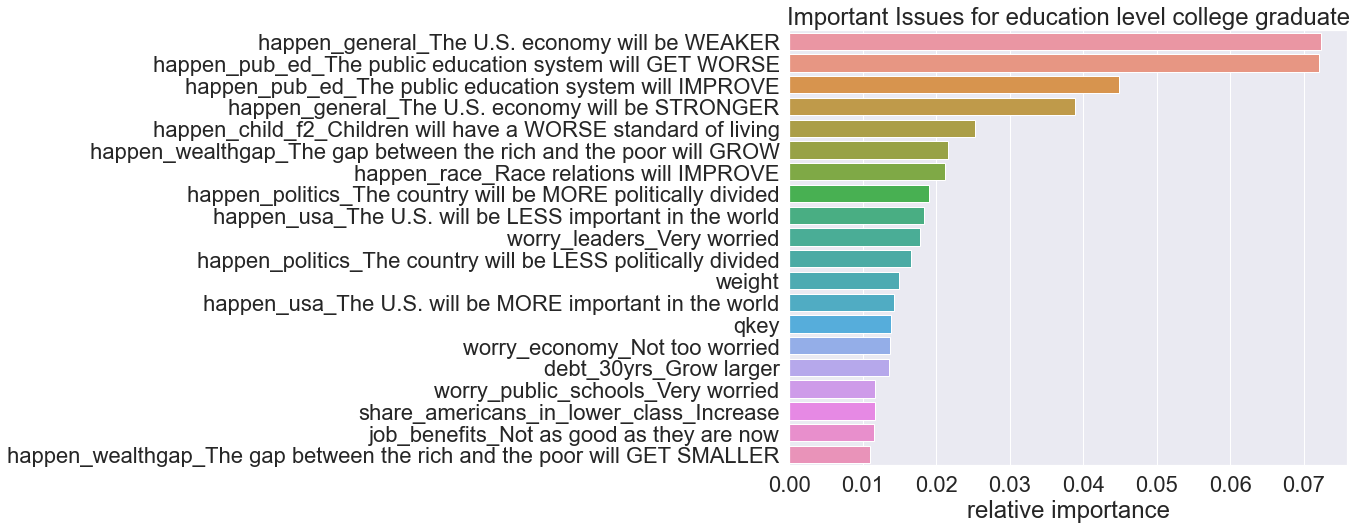

In [116]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_college = sns.barplot(x=feature_importances_college['relative importance'][0:20], y=feature_importances_college.index[0:20]).set(title="Important Issues for education level college graduate")

## Above College Modeling

In [117]:
some_college = e.generate_and_return_obj(some_college_df)
some_college.X_train_dummies.head()

qkey    weight  device_type_Mobile phone  device_type_Tablet  \
2212  201801150581  1.333570                         1                   0   
2242  201801153490  1.481510                         0                   0   
2099  201801139222  1.510276                         0                   0   
2142  201801143133  1.228268                         0                   0   
2226  201801151666  1.343426                         1                   0   

      language_Spanish  form_Form 2  \
2212                 0            0   
2242                 0            1   
2099                 0            1   
2142                 0            1   
2226                 0            0   

      happen_general_The U.S. economy will be STRONGER  \
2212                                                 0   
2242                                                 0   
2099                                                 1   
2142                                                 0   
2226                                                 0   

      happen_general_The U.S. economy will be WEAKER  \
2212                                               1   
2242                                               1   
2099                                               0   
2142                                               1   
2226                                               1   

      happen_health_Health care will be MORE affordable  \
2212                                                  1   
2242                                                  0   
2099                                                  1   
2142                                                  0   
2226                                                  0   

      happen_health_Refused  ...  \
2212                      0  ...   
2242                      0  ...   
2099                      0  ...   
2142                      0  ...   
2226                      0  ...   

      registered_to_vote_You are NOT registered to vote at your current address  \
2212                                                                          0   
2242                                                                          0   
2099                                                                          0   
2142                                                                          0   
2226                                                                          1   

      registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed  \
2212                                                                                                   0   
2242                                                                                                   0   
2099                                                                                                   0   
2142                                                                                                   1   
2226                                                                                                   0   

      political_views_Liberal  political_views_Moderate  \
2212                        1                         0   
2242                        0                         1   
2099                        0                         1   
2142                        0                         1   
2226                        0                         1   

      political_views_Refused  political_views_Very conservative  \
2212                        0                                  0   
2242                        0                                  0   
2099                        0                                  0   
2142                        0                                  0   
2226                        0                                  0   

      political_views_Very liberal  internet_access_Non Internet User  \
2212                             0                                 

In [118]:
print(f'Baseline Accuracy: {round((1.00 - some_college.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 53.63%


In [121]:
# Create a dataframe to store and compare our models' performances
score_df_some_college = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_some_college

Empty DataFrame
Columns: [model_name, train_score, validate_score]
Index: []

In [122]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_some_college = m.test_a_model(some_college.X_train_dummies, some_college.y_train_dummies, some_college.X_validate_dummies, some_college.y_validate_dummies, model, name, score_df_some_college)

In [124]:
score_df_some_college.sort_values(by = 'validate_score', ascending = False).head()

model_name  \
36  including_all_features_random_forest_min_samples_leaf_6_depth_6   
0   including_all_features_random_forest_min_samples_leaf_3_depth_0   
54  including_all_features_random_forest_min_samples_leaf_8_depth_4   
35  including_all_features_random_forest_min_samples_leaf_6_depth_5   
6   including_all_features_random_forest_min_samples_leaf_3_depth_6   

    train_score  validate_score  
36     0.772021        0.771084  
0      0.774611        0.759036  
54     0.782383        0.759036  
35     0.922280        0.746988  
6      0.953368        0.746988

In [125]:
#Make model
rf_depth_6_leaf_6 = RandomForestClassifier(min_samples_leaf=6, max_depth=6)
#Fit Model
rf_depth_6_leaf_6.fit(some_college.X_train_dummies, some_college.y_train_dummies)

RandomForestClassifier(max_depth=6, min_samples_leaf=6)

In [126]:
#Create data frame of feature importances, using our selected model
feature_importances_some_college = pd.DataFrame(rf_depth_6_leaf_6.feature_importances_, index = some_college.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_some_college = feature_importances_some_college.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_some_college.columns.names = ['category']

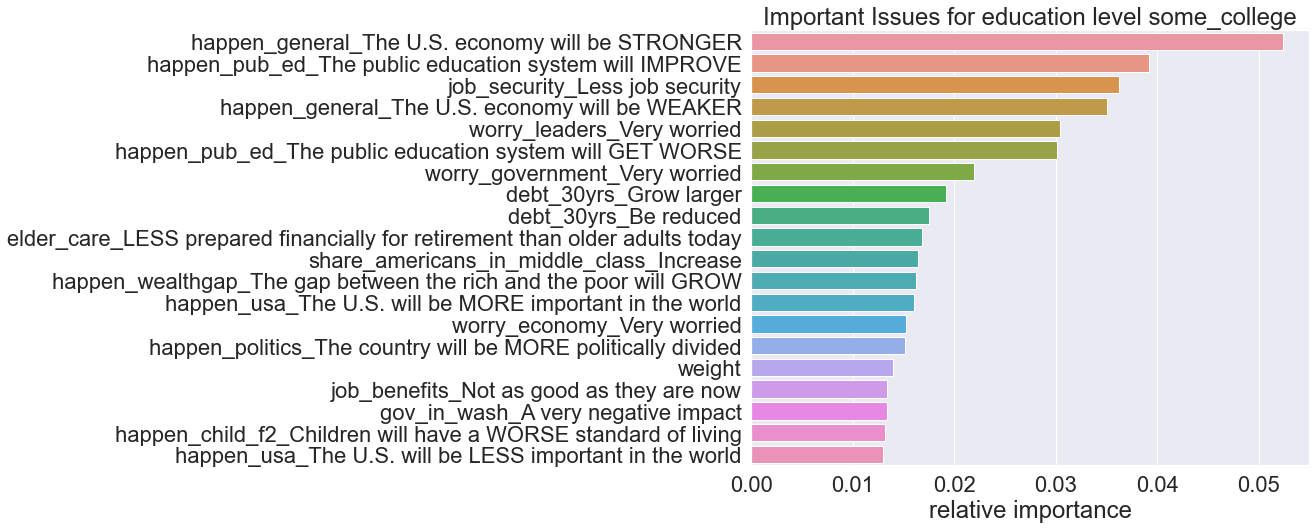

In [127]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_some_college = sns.barplot(x=feature_importances_some_college['relative importance'][0:20], y=feature_importances_some_college.index[0:20]).set(title="Important Issues for education level some_college")

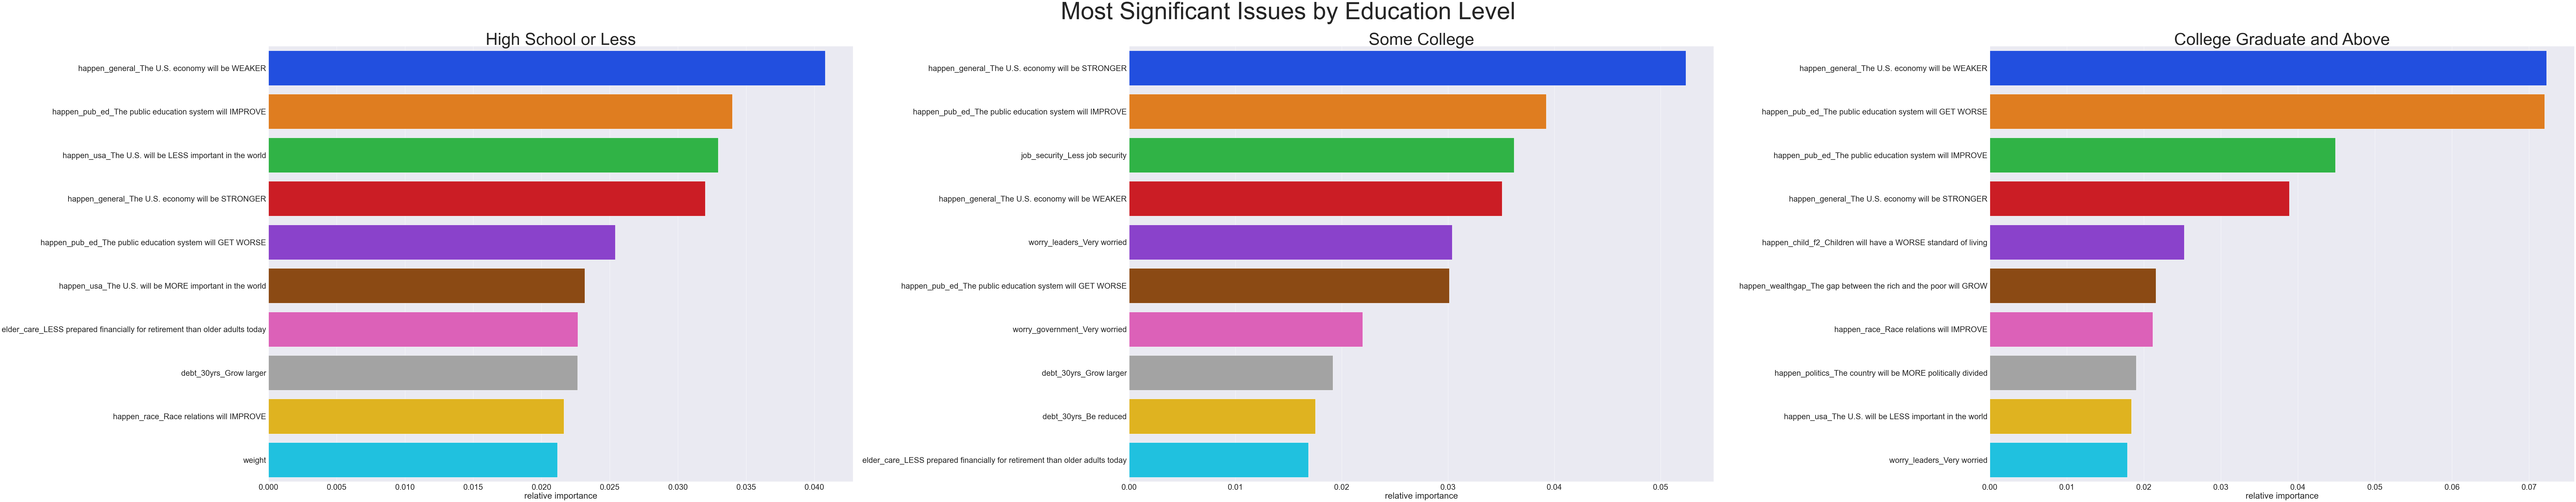

In [133]:
sns.set(font_scale = 3)
sns.set_palette("bright")

fig, axs = plt.subplots(ncols=3, figsize = (150, 30))
fig.suptitle('Most Significant Issues by Education Level', fontsize = 100)

#Below 30,000
relative_importances_high_school = sns.barplot(x=feature_importances_high_school['relative importance'][0:10], y=feature_importances_high_school.index[0:10], ax = axs[0])
relative_importances_high_school.set_title("High School or Less", fontsize = 70)

#30,000 to 75,000
relative_importances_some_college = sns.barplot(x=feature_importances_some_college['relative importance'][0:10], y=feature_importances_some_college.index[0:10], ax = axs[1])
relative_importances_some_college.set_title("Some College", fontsize = 70)

#Over 75,000
relative_importances_college = sns.barplot(x=feature_importances_college['relative importance'][0:10], y=feature_importances_college.index[0:10], ax = axs[2])
relative_importances_college.set_title("College Graduate and Above", fontsize = 70)


#Adjust formatting
fig.tight_layout()